<div class="alert alert-block alert-danger">
<center><h2>Is the Omnivorousness Thesis Still Valid in the United States?: Examining the Cultural Participation Patterns of American Adults</h2></center></div>

<div class="alert alert-block alert-info">
<h3>Objective</h3>
<p>This is a preliminary data analysis that attempts to outline trends in highbrow and popular cultural participation in the United States between 2002 and 2017 and examine whether frequencies of highbrow and popular cultural participation have changed over time for groups of individuals who are categorized according to several descriptive factors, such as social class (education and income), age, gender, marital status, and race.<br><br>
You can find the Medium article of this analysis at:
    <br><br>
    <a href="https://medium.com/@durmusaliyuksek/is-the-omnivorousness-thesis-still-valid-in-the-united-states-d0798c830777">https://medium.com/@durmusaliyuksek/is-the-omnivorousness-thesis-still-valid-in-the-united-states-d0798c830777</a>
</p></div>

<div class="alert alert-block alert-info">
<p>You can download the Survey of Public Participation in the Arts data sets used in the analyses through the below links:</p>

> 2002 SPPA and 2012 SPPA: <a href="https://www.icpsr.umich.edu/web/NADAC/studies/35596">https://www.icpsr.umich.edu/web/NADAC/studies/35596</a><br>
> 2017 SPPA: <a href="https://www.icpsr.umich.edu/web/NADAC/studies/37138">https://www.icpsr.umich.edu/web/NADAC/studies/37138</a><br></div>

In [2]:
# importing the relevant python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg # to calculate the Cronbach alpha scores of the index variables

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<div class="alert alert-block alert-info">
<p>Below, you can find the variables used in the analyses. Each variable is presented here with its name in the datasets (in chronological order as 2002, 2012, 2017), followed by the definition of the variable. Operationalization of each variable are demonstrated below in the Data Manipulation / Data Operationalization Phase.<br>
    <br>
    <b>Variables Used in the Analyses:</b><br>
   * INCOME, INCOME, HEFAMINC : Family income<br>
   * EDUCATION, EDUCATION, PEEEDUCA : Highest level of school completed or degree received<br>
   * AGE, AGE, PRTAGE : Person's age as of the end of the survey week<br>
   * MARITAL, MARITAL, PEMARITL : Marital status<br>
   * GENDER, GENDER, PESEX : Sex<br>
   * RACE, RACE PTDTRACE : Race<br>
    <br>
   * JAZZ, JAZZ, PEC1Q1A : Live jazz performance during the last 12 months<br>
   * CLASSICAL, CLASSICAL, PEC1Q3A : Live classical music performance such as symphony, chamber, or choral music during the last 12 months<br>
   * OPERA, OPERA, PEC1Q4A : Live opera during the last 12 months<br>
   * MUSICAL, MUSICAL, PEC1Q5A : Live musical stage play during the last 12 months<br>
   * PLAY, PLAY, PEC1Q6A : Live non-musical stage play during the last 12 months<br>
   * BALLET, BALLET, PEC1Q7A : Live ballet performance during the last 12 months<br>
   * ARTMUSEUM, ARTMUSEUM, PEC1Q10A : During the last 12 months did you visit an art museum or gallery<br>
    <em><b>The above seven variables were used to create the "Highbrow Cultural Participation Index"</b></em><br>
    <br>
   * SALSA, SALSA, PEC1Q2A : Live Latin, Spanish or salsa music performance during the last 12 months<br>
   * DANCE, DANCE, PEC1Q8A : Live dance performance other than ballet, such as modern, folk, tap or broadway<br>
   * CRAFT_FAIR, CRAFT_FAIR, PEC1Q11A : During the last 12 months did you visit a crafts fair or a visual arts festival<br>
   * FESTIVAL, FESTIVAL, PEC1Q12A : During the last 12 months did you visit an outdoor festival<br>
   * PARK, PARK, PEC1Q13A : During the last 12 months did you visit a historic park or monument<br>
    <em><b>The above five variables were used to create the "Popular Cultural Participation Index"</b></em>
    <p><div>

<div class="alert alert-block alert-success">
<center><h2>Data Manipulation / Data Operationalization Phase</h2></center></div>

<center><h2>SPPA - 2017</h2></center>

In [3]:
df_17 = pd.read_stata('2017_SPPA.dta')

In [4]:
df_17.head().T[:10]

,0,1,2,3,4
CASEID,1,2,3,4,5
HRHHID,4.22012e+12,9.51768e+14,7.10099e+14,6.10009e+14,1.10863e+11
HRMONTH,7,7,7,7,7
HRYEAR4,2017,2017,2017,2017,2017
HURESPLI,Blank,Blank,Blank,Blank,Blank
HUFINAL,Unoccupied tent or trail,Vacant regular,Vacant regular,Vacant regular,Vacant regular
HULANGCODE,Unlabeled/not Spanish,Unlabeled/not Spanish,Unlabeled/not Spanish,Unlabeled/not Spanish,Unlabeled/not Spanish
HETENURE,Blank,Blank,Blank,Blank,Blank
HEHOUSUT,Unoccupied tent site or trailer site,"House, apartment, flat","House, apartment, flat","House, apartment, flat","House, apartment, flat"
HETELHHD,Blank,Blank,Blank,Blank,Blank


### Predictor Variables

In [5]:
### Family Income

In [6]:
df_17.HEFAMINC.value_counts().sort_index()

Blank                 21798
Less than $5,000       2824
5,000 TO 7,499         1437
7,500 TO 9,999         2430
10,000 TO 12,499       2969
12,500 TO 14,999       2661
15,000 TO 19,999       4662
20,000 TO 24,999       5818
25,000 TO 29,999       6074
30,000 TO 34,999       7158
35,000 TO 39,999       6562
40,000 TO 49,999       9826
50,000 TO 59,999      10516
60,000 TO 74,999      13930
75,000 TO 99,999      16179
100,000 TO 149,999    17692
150,000 or more       15093
Name: HEFAMINC, dtype: int64

In [7]:
def convert_income_17(x):
    if x == 'Blank':x = np.nan
    elif x == 'Less than $5,000':x = 3000
    elif x == '5,000 TO 7,499':x = 6250
    elif x == '7,500 TO 9,999':x = 8750
    elif x == '10,000 TO 12,499':x = 11250
    elif x == '12,500 TO 14,999':x = 13750
    elif x == '15,000 TO 19,999':x = 17500
    elif x == '20,000 TO 24,999':x = 22500
    elif x == '25,000 TO 29,999':x = 27500
    elif x == '30,000 TO 34,999':x = 32500
    elif x == '35,000 TO 39,999':x = 37500
    elif x == '40,000 TO 49,999':x = 45000
    elif x == '50,000 TO 59,999':x = 55000
    elif x == '60,000 TO 74,999':x = 67500
    elif x == '75,000 TO 99,999':x = 87500
    elif x == '100,000 TO 149,999':x = 125000
    elif x == '150,000 or more':x = 200000
    return x

In [8]:
df_17.HEFAMINC = df_17.HEFAMINC.apply(convert_income_17)

In [9]:
df_17.HEFAMINC.value_counts(dropna=False).sort_index()

3000.0       2824
6250.0       1437
8750.0       2430
11250.0      2969
13750.0      2661
17500.0      4662
22500.0      5818
27500.0      6074
32500.0      7158
37500.0      6562
45000.0      9826
55000.0     10516
67500.0     13930
87500.0     16179
125000.0    17692
200000.0    15093
NaN         21798
Name: HEFAMINC, dtype: int64

In [10]:
### Age of Respondent

In [11]:
df_17.PRTAGE.value_counts(dropna=False)

Blank    21798
80        2535
85        2471
57        1816
53        1814
         ...  
75         900
76         838
77         773
78         666
79         657
Name: PRTAGE, Length: 83, dtype: int64

In [12]:
df_17.PRTAGE.replace(to_replace='Blank', value=np.nan, inplace=True)

In [13]:
df_17.PRTAGE = df_17.PRTAGE[df_17.PRTAGE != 'Blank'].astype('float64')

In [14]:
df_17.PRTAGE.value_counts(dropna=False).sort_index()

0.0      1138
1.0      1415
2.0      1464
3.0      1531
4.0      1449
        ...  
78.0      666
79.0      657
80.0     2535
85.0     2471
NaN     21798
Name: PRTAGE, Length: 83, dtype: int64

In [15]:
### Marital Status

In [16]:
df_17.PEMARITL.value_counts(dropna=False).sort_index()

Blank                       45010
Married - spouse present    52134
Married - spouse absent      1552
Widowed                      6290
Divorced                    10816
Separated                    1778
Never married               30049
Name: PEMARITL, dtype: int64

In [17]:
def convert_marital_17(x):
    if x == 'Blank':x = np.nan
    elif x == 'Married - spouse present':x = 1
    elif x == 'Married - spouse absent':x = 1
    elif x == 'Widowed':x = 0
    elif x == 'Divorced':x = 0
    elif x == 'Separated':x = 0
    elif x == 'Never married':x = 0
    return x

In [18]:
df_17.PEMARITL = df_17.PEMARITL.apply(convert_marital_17)

In [19]:
df_17.PEMARITL.value_counts(dropna=False).sort_index()

0.0    48933
1.0    53686
NaN    45010
Name: PEMARITL, dtype: int64

In [20]:
### Gender

In [21]:
df_17.PESEX.value_counts()

Female    64752
Male      61079
Blank     21798
Name: PESEX, dtype: int64

In [22]:
df_17.PESEX.replace({'Female': 1, 'Male': 0, 'Blank': np.nan}, inplace=True)

In [23]:
df_17.PESEX.value_counts(dropna=False)

1.0    64752
0.0    61079
NaN    21798
Name: PESEX, dtype: int64

In [24]:
### Education

In [25]:
df_17.PEEDUCA.value_counts().sort_index()

Blank                                           45010
Less than 1st grade                               297
1st, 2nd, 3rd or 4th grade                        529
5th or 6th grade                                 1054
7th or 8th grade                                 1803
9th grade                                        2513
10th grade                                       3154
11th grade                                       3383
12th grade no diploma                            1412
High school grad-diploma or equiv (GED)         29233
Some college but no degree                      17890
Associate degree-occupational/vocational         4267
Associate degree-academic program                5578
Bachelor's degree (ex: BA, AB, BS)              20076
Master's degree (ex: MA, MS, MEng, MEd, MSW)     8348
Professional school deg (ex: MD, DDS, DVM)       1310
Doctorate degree (ex: PhD, EdD)                  1772
Name: PEEDUCA, dtype: int64

In [26]:
def convert_education_17(x):
    if x == 'Blank':x = np.nan
    elif x == 'Less than 1st grade':x = 1
    elif x == '1st, 2nd, 3rd or 4th grade':x = 3
    elif x == '5th or 6th grade':x = 5
    elif x == '7th or 8th grade':x = 7
    elif x == '9th grade':x = 9
    elif x == '10th grade':x = 10
    elif x == '11th grade':x = 11
    elif x == '12th grade no diploma':x = 12
    elif x == 'High school grad-diploma or equiv (GED)':x = 12
    elif x == 'Some college but no degree':x = 13
    elif x == 'Associate degree-occupational/vocational':x = 14
    elif x == 'Associate degree-academic program':x = 14
    elif x == "Bachelor's degree (ex: BA, AB, BS)":x = 16
    elif x == "Master's degree (ex: MA, MS, MEng, MEd, MSW)":x = 18
    elif x == 'Professional school deg (ex: MD, DDS, DVM)':x = 18
    elif x == 'Doctorate degree (ex: PhD, EdD)':x = 20
    return x

In [27]:
df_17.PEEDUCA = df_17.PEEDUCA.apply(convert_education_17)

In [28]:
df_17.PEEDUCA.value_counts(dropna=False).sort_index()

1.0       297
3.0       529
5.0      1054
7.0      1803
9.0      2513
10.0     3154
11.0     3383
12.0    30645
13.0    17890
14.0     9845
16.0    20076
18.0     9658
20.0     1772
NaN     45010
Name: PEEDUCA, dtype: int64

In [29]:
### Race

In [30]:
df_17.PTDTRACE.value_counts()

White Only                              100565
Blank                                    21798
Black Only                               13531
Asian Only                                6539
American Indian, Alaskan Native Only      1775
White-AI                                   866
White-Black                                824
Hawaiian/Pacific Islander Only             598
White-Asian                                519
Black-AI                                   131
White-HP                                   113
W-B-AI                                     112
W-A-HP                                      72
Asian-HP                                    58
Black-Asian                                 35
W-B-A                                       33
Black-HP                                    11
Other 4 and 5 Race Combinations             10
Other 3 Race Combinations                    9
W-B-HP                                       8
W-AI-A                                       7
AI-Asian     

In [31]:
def convert_race_17(x):
    if x == 'Blank':x = np.nan
    elif x == 'White Only':x = 1
    else: x = 0
    return x

In [32]:
df_17.PTDTRACE = df_17.PTDTRACE.apply(convert_race_17)

In [33]:
df_17.PTDTRACE.value_counts(dropna=False)

1.0    100565
0.0     25266
NaN     21798
Name: PTDTRACE, dtype: int64

### Highbrow Cultural Activities

In [34]:
### Jazz

In [35]:
df_17.PEC1Q1A.value_counts()

Not in universe    138785
No                   8011
Yes                   803
Don't know             30
Name: PEC1Q1A, dtype: int64

In [36]:
def convert_jazz_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [37]:
df_17.PEC1Q1A = df_17.PEC1Q1A.apply(convert_jazz_17)

In [38]:
df_17.PEC1Q1A.value_counts(dropna=False)

NaN    138815
0.0      8011
1.0       803
Name: PEC1Q1A, dtype: int64

In [39]:
### Classical Music

In [40]:
df_17.PEC1Q3A.value_counts()

Not in universe    138785
No                   7949
Yes                   823
No response            29
Don't know             25
Refused                18
Name: PEC1Q3A, dtype: int64

In [41]:
def convert_classical_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [42]:
df_17.PEC1Q3A = df_17.PEC1Q3A.apply(convert_classical_17)

In [43]:
df_17.PEC1Q3A.value_counts(dropna=False)

NaN    138857
0.0      7949
1.0       823
Name: PEC1Q3A, dtype: int64

In [44]:
### Opera

In [45]:
df_17.PEC1Q4A.value_counts()

Not in universe    138785
No                   8552
Yes                   216
No response            38
Don't know             20
Refused                18
Name: PEC1Q4A, dtype: int64

In [46]:
def convert_opera_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [47]:
df_17.PEC1Q4A = df_17.PEC1Q4A.apply(convert_opera_17)

In [48]:
df_17.PEC1Q4A.value_counts(dropna=False)

NaN    138861
0.0      8552
1.0       216
Name: PEC1Q4A, dtype: int64

In [49]:
### Musical Stage Play

In [50]:
df_17.PEC1Q5A.value_counts()

Not in universe    138785
No                   7231
Yes                  1524
No response            46
Don't know             23
Refused                20
Name: PEC1Q5A, dtype: int64

In [51]:
def convert_musical_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [52]:
df_17.PEC1Q5A = df_17.PEC1Q5A.apply(convert_musical_17)

In [53]:
df_17.PEC1Q5A.value_counts(dropna=False)

NaN    138874
0.0      7231
1.0      1524
Name: PEC1Q5A, dtype: int64

In [54]:
### Nonmusical Stage Play

In [55]:
df_17.PEC1Q6A.value_counts()

Not in universe    138785
No                   7847
Yes                   900
No response            51
Don't know             23
Refused                23
Name: PEC1Q6A, dtype: int64

In [56]:
def convert_nonmusical_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [57]:
df_17.PEC1Q6A = df_17.PEC1Q6A.apply(convert_nonmusical_17)

In [58]:
df_17.PEC1Q6A.value_counts(dropna=False)

NaN    138882
0.0      7847
1.0       900
Name: PEC1Q6A, dtype: int64

In [59]:
### Ballet

In [60]:
df_17.PEC1Q7A.value_counts()

Not in universe    138785
No                   8445
Yes                   302
No response            54
Refused                24
Don't know             19
Name: PEC1Q7A, dtype: int64

In [61]:
def convert_ballet_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [62]:
df_17.PEC1Q7A = df_17.PEC1Q7A.apply(convert_ballet_17)

In [63]:
df_17.PEC1Q7A.value_counts(dropna=False)

NaN    138882
0.0      8445
1.0       302
Name: PEC1Q7A, dtype: int64

In [64]:
### Art Museum Visit

In [65]:
df_17.PEC1Q10A.value_counts()

Not in universe    138785
No                   6554
Yes                  2157
No response            72
Refused                38
Don't know             23
Name: PEC1Q10A, dtype: int64

In [66]:
def convert_artmuseum_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [67]:
df_17.PEC1Q10A = df_17.PEC1Q10A.apply(convert_artmuseum_17)

In [68]:
df_17.PEC1Q10A.value_counts(dropna=False)

NaN    138918
0.0      6554
1.0      2157
Name: PEC1Q10A, dtype: int64

In [69]:
pg.cronbach_alpha(data=df_17[['PEC1Q1A','PEC1Q3A','PEC1Q4A','PEC1Q5A','PEC1Q6A','PEC1Q7A','PEC1Q10A']])

(0.706431512049645, array([0.704, 0.709]))

<p>The general rule of thumb is that a Cronbach's alpha of 0.70 and above is good. So, I will continue with this index.</p>

In [70]:
# This function was written to create an index using the seven highbrow cultural activities.
def combine(liste):
    count = 0
    summ = 0
    for i in liste:
        if np.isnan(i):
            count += 1
    else:
        for i in liste:
            if np.isnan(i):
                i = 0
            summ += i
    if count == len(liste):
        result = np.nan
    else:
        result = summ
    return result

In [71]:
df_17['highbrow'] = np.apply_along_axis(combine, axis = 1, arr = 
                            df_17[['PEC1Q1A','PEC1Q3A','PEC1Q4A','PEC1Q5A','PEC1Q6A','PEC1Q7A','PEC1Q10A']].values)

In [72]:
df_17['highbrow'].value_counts(dropna=False)

NaN    138802
0.0      5613
1.0      1441
2.0       811
3.0       459
4.0       306
5.0       131
6.0        56
7.0        10
Name: highbrow, dtype: int64

### Popular Cultural Activities

In [73]:
### Salsa

In [74]:
df_17.PEC1Q2A.value_counts()

Not in universe    138785
No                   8363
Yes                   423
Don't know             25
No response            18
Refused                15
Name: PEC1Q2A, dtype: int64

In [75]:
def convert_popular_17(x):
    if x == "Don't know":x = np.nan
    elif x == 'Not in universe':x = np.nan
    elif x == 'No response':x = np.nan
    elif x == 'Refused':x = np.nan
    elif x == 'Yes':x = 1
    elif x == 'No':x = 0
    return x

In [76]:
df_17.PEC1Q2A = df_17.PEC1Q2A.apply(convert_popular_17)

In [77]:
df_17.PEC1Q2A.value_counts(dropna=False)

NaN    138843
0.0      8363
1.0       423
Name: PEC1Q2A, dtype: int64

In [78]:
### Dance

In [79]:
df_17.PEC1Q8A.value_counts()

Not in universe    138785
No                   8159
Yes                   577
No response            59
Refused                30
Don't know             19
Name: PEC1Q8A, dtype: int64

In [80]:
df_17.PEC1Q8A = df_17.PEC1Q8A.apply(convert_popular_17)

In [81]:
df_17.PEC1Q8A.value_counts(dropna=False)

NaN    138893
0.0      8159
1.0       577
Name: PEC1Q8A, dtype: int64

In [82]:
### Crafts Fair

In [83]:
df_17.PEC1Q11A.value_counts()

Not in universe    138785
No                   6470
Yes                  2234
No response            75
Refused                42
Don't know             23
Name: PEC1Q11A, dtype: int64

In [84]:
df_17.PEC1Q11A = df_17.PEC1Q11A.apply(convert_popular_17)

In [85]:
df_17.PEC1Q11A.value_counts(dropna=False)

NaN    138925
0.0      6470
1.0      2234
Name: PEC1Q11A, dtype: int64

In [86]:
### Outdoor Festival

In [87]:
df_17.PEC1Q12A.value_counts()

Not in universe    138785
No                   6595
Yes                  2103
No response            79
Refused                43
Don't know             24
Name: PEC1Q12A, dtype: int64

In [88]:
df_17.PEC1Q12A = df_17.PEC1Q12A.apply(convert_popular_17)

In [89]:
df_17.PEC1Q12A.value_counts(dropna=False)

NaN    138931
0.0      6595
1.0      2103
Name: PEC1Q12A, dtype: int64

In [90]:
### Historic Tour

In [91]:
df_17.PEC1Q13A.value_counts()

Not in universe    138785
No                   6098
Yes                  2582
No response            83
Refused                49
Don't know             32
Name: PEC1Q13A, dtype: int64

In [92]:
df_17.PEC1Q13A = df_17.PEC1Q13A.apply(convert_popular_17)

In [93]:
df_17.PEC1Q13A.value_counts(dropna=False)

NaN    138949
0.0      6098
1.0      2582
Name: PEC1Q13A, dtype: int64

In [94]:
pg.cronbach_alpha(data=df_17[['PEC1Q2A','PEC1Q8A','PEC1Q11A','PEC1Q12A','PEC1Q13A']])

(0.6281261224049126, array([0.625, 0.631]))

<p>The general rule of thumb is that a Cronbach's alpha of 0.70 and above is good. But some resources state that if the value of Cronbach Alpha is within the range of 0.60 to 0.80, it means that the value of Cronbach Alpha is moderate and acceptable. So, I will stick with this conclusion and use the popular cultural participation index as is.</p>

In [95]:
# I use the same function that I used for the highbrow cultural participation index to create a 
# popular cultural participation index.
df_17['popular'] = np.apply_along_axis(combine, axis = 1, arr = 
                            df_17[['PEC1Q2A','PEC1Q8A','PEC1Q11A','PEC1Q12A','PEC1Q13A']].values)

In [96]:
df_17.popular.value_counts(dropna=False)

NaN    138835
0.0      4690
1.0      1742
2.0      1259
3.0       807
4.0       242
5.0        54
Name: popular, dtype: int64

In [97]:
data_17 = df_17[['highbrow', 'popular', 'HEFAMINC', 'PEEDUCA', 'PRTAGE', 'PEMARITL', 'PESEX', 'PTDTRACE']]

In [99]:
data_17.head()

,highbrow,popular,HEFAMINC,PEEDUCA,PRTAGE,PEMARITL,PESEX,PTDTRACE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
data_17 = data_17.dropna()

In [101]:
data_17.head()

,highbrow,popular,HEFAMINC,PEEDUCA,PRTAGE,PEMARITL,PESEX,PTDTRACE
43,0.0,0.0,87500.0,11.0,48.0,1.0,1.0,1.0
59,0.0,0.0,13750.0,12.0,78.0,0.0,1.0,1.0
93,0.0,0.0,11250.0,12.0,72.0,0.0,1.0,1.0
94,0.0,0.0,55000.0,20.0,51.0,0.0,0.0,1.0
97,0.0,1.0,37500.0,12.0,57.0,1.0,1.0,1.0


In [102]:
data_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 43 to 147552
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   highbrow  8793 non-null   float64
 1   popular   8793 non-null   float64
 2   HEFAMINC  8793 non-null   float64
 3   PEEDUCA   8793 non-null   float64
 4   PRTAGE    8793 non-null   float64
 5   PEMARITL  8793 non-null   float64
 6   PESEX     8793 non-null   float64
 7   PTDTRACE  8793 non-null   float64
dtypes: float64(8)
memory usage: 618.3 KB


In [103]:
data_17.isnull().sum()

highbrow    0
popular     0
HEFAMINC    0
PEEDUCA     0
PRTAGE      0
PEMARITL    0
PESEX       0
PTDTRACE    0
dtype: int64

In [104]:
data_17.describe()

,highbrow,popular,HEFAMINC,PEEDUCA,PRTAGE,PEMARITL,PESEX,PTDTRACE
count,8793.000000,8793.000000,8793.000000,8793.000000,8793.000000,8793.000000,8793.000000,8793.000000
mean,0.764131,0.900603,68935.346298,13.708973,51.088707,0.467986,0.544410,0.828159
std,1.277687,1.174645,55994.223722,2.790295,18.102927,0.499002,0.498052,0.377264
min,0.000000,0.000000,3000.000000,1.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27500.000000,12.000000,35.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,55000.000000,13.000000,52.000000,0.000000,1.000000,1.000000
75%,1.000000,2.000000,87500.000000,16.000000,66.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,200000.000000,20.000000,85.000000,1.000000,1.000000,1.000000


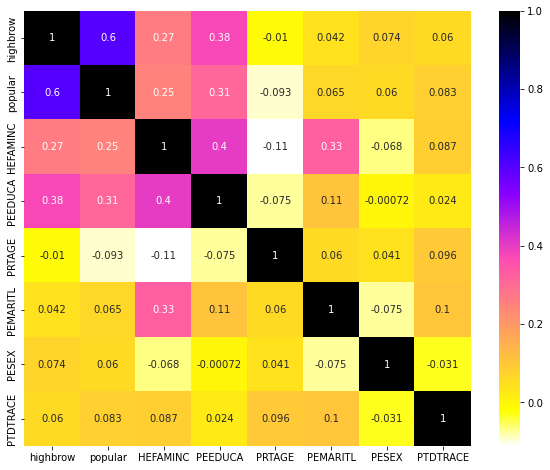

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(data_17.corr(), annot=True, cmap="gnuplot2_r");

<center><h2>SPPA - 2012</h2></center>

In [6]:
df_12 = pd.read_stata('2012_SPPA.dta')

In [7]:
df_12.head().T[:10]

,0,1,2,3,4
PERSID,110492012,361562012,361572012,104602012,332192012
MONTH,JULY,JULY,JULY,JULY,JULY
YEAR,2012,2012,2012,2012,2012
LANGUAGE,0,0,0,0,0
OWN_RENT,OWNED OR BEING BOUGHT BY A HH MEMBER,OWNED OR BEING BOUGHT BY A HH MEMBER,-1,OWNED OR BEING BOUGHT BY A HH MEMBER,OWNED OR BEING BOUGHT BY A HH MEMBER
HOUSING,"HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT",MOBILE HOME OR TRAILER W/NO PERM. ROOM ADDED
TELEPHONE,YES,YES,YES,YES,YES
INCOME,"12,500 TO 14,999","75,000 TO 99,999","75,000 TO 99,999","25,000 TO 29,999","25,000 TO 29,999"
HHSIZE,1,2,2,1,2
REGION,SOUTH,SOUTH,SOUTH,SOUTH,SOUTH


### Predictor Variables

In [108]:
### Family Income

In [109]:
df_12.INCOME.value_counts().sort_index()

LESS THAN $5,000       434
5,000 TO 7,499         306
7,500 TO 9,999         366
10,000 TO 12,499       494
12,500 TO 14,999       552
15,000 TO 19,999       830
20,000 TO 24,999      1062
25,000 TO 29,999      1062
30,000 TO 34,999      1069
35,000 TO 39,999       953
40,000 TO 49,999      1616
50,000 TO 59,999      1625
60,000 TO 74,999      1822
75,000 TO 99,999      2235
100,000 TO 149,999    2138
150,000 OR MORE       1487
Name: INCOME, dtype: int64

In [110]:
def convert_income_12(x):
    if x == 'LESS THAN $5,000':x = 3000
    elif x == '5,000 TO 7,499':x = 6250
    elif x == '7,500 TO 9,999':x = 8750
    elif x == '10,000 TO 12,499':x = 11250
    elif x == '12,500 TO 14,999':x = 13750
    elif x == '15,000 TO 19,999':x = 17500
    elif x == '20,000 TO 24,999':x = 22500
    elif x == '25,000 TO 29,999':x = 27500
    elif x == '30,000 TO 34,999':x = 32500
    elif x == '35,000 TO 39,999':x = 37500
    elif x == '40,000 TO 49,999':x = 45000
    elif x == '50,000 TO 59,999':x = 55000
    elif x == '60,000 TO 74,999':x = 67500
    elif x == '75,000 TO 99,999':x = 87500
    elif x == '100,000 TO 149,999':x = 125000
    elif x == '150,000 OR MORE':x = 200000
    return x

In [111]:
df_12.INCOME = df_12.INCOME.apply(convert_income_12)

In [112]:
df_12.INCOME.value_counts(dropna=False).sort_index()

3000       434
6250       306
8750       366
11250      494
13750      552
17500      830
22500     1062
27500     1062
32500     1069
37500      953
45000     1616
55000     1625
67500     1822
87500     2235
125000    2138
200000    1487
Name: INCOME, dtype: int64

In [113]:
df_12.INCOME = df_12.INCOME.astype('float64')

In [114]:
### Age of Respondent

In [115]:
df_12.AGE.value_counts(dropna=False)

80    530
85    456
57    391
53    381
56    375
     ... 
76    147
78    140
77    138
75    136
79    123
Name: AGE, Length: 64, dtype: int64

In [116]:
df_12.AGE = df_12.AGE.astype('float64')

In [117]:
df_12.AGE.value_counts(dropna=False).sort_index()

18.0    214
19.0    206
20.0    190
21.0    244
22.0    192
       ... 
77.0    138
78.0    140
79.0    123
80.0    530
85.0    456
Name: AGE, Length: 64, dtype: int64

In [118]:
### Marital Status

In [119]:
df_12.MARITAL.value_counts(dropna=False).sort_index()

MARRIED                    10233
MARRIED - SPOUSE ABSENT      240
WIDOWED                     1239
DIVORCED                    2102
SEPARATED                    358
NEVER MARRIED               3879
Name: MARITAL, dtype: int64

In [120]:
def convert_marital_12(x):
    if x == 'MARRIED':x = 1
    elif x == 'MARRIED - SPOUSE ABSENT':x = 1
    elif x == 'WIDOWED':x = 0
    elif x == 'DIVORCED':x = 0
    elif x == 'SEPARATED':x = 0
    elif x == 'NEVER MARRIED':x = 0
    return x

In [121]:
df_12.MARITAL = df_12.MARITAL.apply(convert_marital_12)

In [122]:
df_12.MARITAL.value_counts(dropna=False).sort_index()

0     7578
1    10473
Name: MARITAL, dtype: int64

In [123]:
### Gender

In [124]:
df_12.GENDER.value_counts()

Female    9617
Male      8434
Name: GENDER, dtype: int64

In [125]:
df_12.GENDER.replace({'Female': 1, 'Male': 0}, inplace=True)

In [126]:
df_12.GENDER.value_counts()

1    9617
0    8434
Name: GENDER, dtype: int64

In [127]:
### Education

In [128]:
df_12.EDUCATION.value_counts().sort_index()

LESS THAN 9TH GRADE          667
SOME HIGH SCHOOL            1283
HIGH SCHOOL GRAD (GED)      5366
SOME COLLEGE                5227
COLLEGE GRADUATE            3480
ADVANCED GRADUATE DEGREE    2028
Name: EDUCATION, dtype: int64

In [129]:
def convert_education_12(x):
    if x == 'LESS THAN 9TH GRADE':x = 7
    elif x == 'SOME HIGH SCHOOL':x = 10
    elif x == 'HIGH SCHOOL GRAD (GED)':x = 12
    elif x == 'SOME COLLEGE':x = 13
    elif x == 'COLLEGE GRADUATE':x = 16
    elif x == 'ADVANCED GRADUATE DEGREE':x = 18
    return x

In [130]:
df_12.EDUCATION = df_12.EDUCATION.apply(convert_education_12)

In [131]:
df_12.EDUCATION.value_counts().sort_index()

7      667
10    1283
12    5366
13    5227
16    3480
18    2028
Name: EDUCATION, dtype: int64

In [132]:
df_12.EDUCATION = df_12.EDUCATION.astype('float64')

In [133]:
### Race

In [134]:
df_12.RACE.value_counts()

White Only                                 15147
Black Only                                  1582
Asian or Hawaiian/Pacific Islander Only      778
American Indian, Alaskan Native Only         211
White-AI                                     129
5                                             68
White-Black                                   49
White-Asian                                   28
W-B-AI                                        16
Black-AI                                      14
White-Hawaiian                                12
4 or 5 Races                                  10
W-B-A                                          4
W-B-AI-A                                       3
Name: RACE, dtype: int64

In [135]:
def convert_race_12(x):
    if x == 'White Only':x = 1
    else: x = 0
    return x

In [136]:
df_12.RACE = df_12.RACE.apply(convert_race_12)

In [137]:
df_12.RACE.value_counts()

1    15147
0     2904
Name: RACE, dtype: int64

### Highbrow Cultural Activities

In [138]:
### Jazz

In [139]:
df_12.JAZZ.value_counts()

NO            16434
YES            1553
DON'T KNOW       64
Name: JAZZ, dtype: int64

In [140]:
def convert_jazz_12(x):
    if x == "DON'T KNOW":x = np.nan
    elif x == 'YES':x = 1
    elif x == 'NO':x = 0
    return x

In [141]:
df_12.JAZZ = df_12.JAZZ.apply(convert_jazz_12)

In [142]:
df_12.JAZZ.value_counts(dropna=False)

0.0    16434
1.0     1553
NaN       64
Name: JAZZ, dtype: int64

In [143]:
### Classical Music

In [144]:
df_12.CLASSICAL.value_counts()

NO             16129
YES             1788
DON'T KNOW        56
NO RESPONSE       54
REFUSED           24
Name: CLASSICAL, dtype: int64

In [145]:
### Opera

In [146]:
df_12.OPERA.value_counts()

NO             17489
YES              418
NO RESPONSE       64
DON'T KNOW        51
REFUSED           29
Name: OPERA, dtype: int64

In [147]:
### Musical Stage Play

In [148]:
df_12.MUSICAL.value_counts()

NO             14917
YES             2963
NO RESPONSE       75
DON'T KNOW        60
REFUSED           36
Name: MUSICAL, dtype: int64

In [149]:
### Nonmusical Stage Play

In [150]:
df_12.PLAY.value_counts()

NO             16162
YES             1697
NO RESPONSE       89
DON'T KNOW        65
REFUSED           38
Name: PLAY, dtype: int64

In [151]:
### Ballet

In [152]:
df_12.BALLET.value_counts()

NO             17305
YES              561
NO RESPONSE       98
DON'T KNOW        48
REFUSED           39
Name: BALLET, dtype: int64

In [153]:
### Artmuseum Visit

In [154]:
df_12.ARTMUSEUM.value_counts()

NO             13714
YES             4084
NO RESPONSE      130
DON'T KNOW        74
REFUSED           49
Name: ARTMUSEUM, dtype: int64

In [155]:
def convert_other_highbrow_12(x):
    if x == "DON'T KNOW":x = np.nan
    elif x == 'NO RESPONSE':x = np.nan
    elif x == 'REFUSED':x = np.nan
    elif x == 'YES':x = 1
    elif x == 'NO':x = 0
    return x

In [156]:
df_12[['CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']] = df_12[['CLASSICAL', 
                        'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']].applymap(convert_other_highbrow_12)

In [157]:
df_12.CLASSICAL.value_counts(dropna=False)

0.0    16129
1.0     1788
NaN      134
Name: CLASSICAL, dtype: int64

In [158]:
df_12.OPERA.value_counts(dropna=False)

0.0    17489
1.0      418
NaN      144
Name: OPERA, dtype: int64

In [159]:
df_12.MUSICAL.value_counts(dropna=False)

0.0    14917
1.0     2963
NaN      171
Name: MUSICAL, dtype: int64

In [160]:
df_12.PLAY.value_counts(dropna=False)

0.0    16162
1.0     1697
NaN      192
Name: PLAY, dtype: int64

In [161]:
df_12.BALLET.value_counts(dropna=False)

0.0    17305
1.0      561
NaN      185
Name: BALLET, dtype: int64

In [162]:
df_12.ARTMUSEUM.value_counts(dropna=False)

0.0    13714
1.0     4084
NaN      253
Name: ARTMUSEUM, dtype: int64

In [163]:
pg.cronbach_alpha(data=df_12[['JAZZ','CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']])

(0.6950575411810952, array([0.688, 0.702]))

<p>The general rule of thumb is that a Cronbach's alpha of 0.70 and above is good. So, I will continue with this index.</p>

In [164]:
df_12['highbrow'] = np.apply_along_axis(combine, axis = 1, arr = 
                            df_12[['JAZZ','CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']].values)

In [165]:
df_12['highbrow'].value_counts(dropna=False)

0.0    11545
1.0     3123
2.0     1527
3.0      865
4.0      588
5.0      238
6.0       97
NaN       44
7.0       24
Name: highbrow, dtype: int64

### Popular Cultural Activities

In [166]:
### Salsa

In [167]:
df_12.SALSA.value_counts()

NO             17131
YES              812
DON'T KNOW        57
NO RESPONSE       27
REFUSED           24
Name: SALSA, dtype: int64

In [168]:
### Dance

In [169]:
df_12.DANCE.value_counts()

NO             16762
YES             1093
NO RESPONSE      106
DON'T KNOW        52
REFUSED           38
Name: DANCE, dtype: int64

In [170]:
### Craft Fair

In [171]:
df_12.CRAFT_FAIR.value_counts()

NO             13330
YES             4449
NO RESPONSE      139
DON'T KNOW        75
REFUSED           58
Name: CRAFT_FAIR, dtype: int64

In [172]:
### Festival

In [173]:
df_12.FESTIVAL.value_counts()

NO             13858
YES             3907
NO RESPONSE      143
DON'T KNOW        79
REFUSED           64
Name: FESTIVAL, dtype: int64

In [174]:
### Historic Park

In [175]:
df_12.PARK.value_counts()

NO             13060
YES             4678
NO RESPONSE      155
DON'T KNOW        85
REFUSED           73
Name: PARK, dtype: int64

In [176]:
def convert_popular_12(x):
    if x == "DON'T KNOW":x = np.nan
    elif x == 'NO RESPONSE':x = np.nan
    elif x == 'REFUSED':x = np.nan
    elif x == 'YES':x = 1
    elif x == 'NO':x = 0
    return x

In [177]:
df_12[['SALSA', 'DANCE', 'CRAFT_FAIR', 'FESTIVAL', 'PARK']] = df_12[['SALSA', 
                    'DANCE', 'CRAFT_FAIR', 'FESTIVAL', 'PARK']].applymap(convert_popular_12)

In [178]:
df_12.SALSA.value_counts(dropna=False)

0.0    17131
1.0      812
NaN      108
Name: SALSA, dtype: int64

In [179]:
df_12.DANCE.value_counts(dropna=False)

0.0    16762
1.0     1093
NaN      196
Name: DANCE, dtype: int64

In [180]:
df_12.CRAFT_FAIR.value_counts(dropna=False)

0.0    13330
1.0     4449
NaN      272
Name: CRAFT_FAIR, dtype: int64

In [181]:
df_12.FESTIVAL.value_counts(dropna=False)

0.0    13858
1.0     3907
NaN      286
Name: FESTIVAL, dtype: int64

In [182]:
df_12.PARK.value_counts(dropna=False)

0.0    13060
1.0     4678
NaN      313
Name: PARK, dtype: int64

In [183]:
pg.cronbach_alpha(data=df_12[['SALSA', 'DANCE', 'CRAFT_FAIR', 'FESTIVAL', 'PARK']])

(0.6339343467911183, array([0.625, 0.642]))

<p>The general rule of thumb is that a Cronbach's alpha of 0.70 and above is good. But some resources state that if the value of Cronbach Alpha is within the range of 0.60 to 0.80, it means that the value of Cronbach Alpha is moderate and acceptable. So, I will stick with this conclusion and use the popular cultural participation index as is.</p>

In [184]:
df_12['popular'] = np.apply_along_axis(combine, axis = 1, arr = 
                            df_12[['SALSA', 'DANCE', 'CRAFT_FAIR', 'FESTIVAL', 'PARK']].values)

In [185]:
df_12.popular.value_counts(dropna=False)

0.0    10137
1.0     3441
2.0     2276
3.0     1575
4.0      429
5.0      101
NaN       92
Name: popular, dtype: int64

In [186]:
data_12 = df_12[['highbrow', 'popular', 'INCOME', 'EDUCATION', 'AGE', 'MARITAL', 'GENDER', 'RACE']]

In [187]:
data_12.head()

,highbrow,popular,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,0.0,13750.0,7.0,67.0,0,1,1
1,0.0,0.0,87500.0,12.0,57.0,1,0,1
2,0.0,0.0,87500.0,12.0,61.0,1,1,1
3,0.0,0.0,27500.0,13.0,41.0,0,0,1
4,0.0,1.0,27500.0,13.0,57.0,1,0,1


In [188]:
data_12.isnull().sum()

highbrow     44
popular      92
INCOME        0
EDUCATION     0
AGE           0
MARITAL       0
GENDER        0
RACE          0
dtype: int64

In [189]:
data_12 = data_12.dropna()

In [190]:
data_12.head()

,highbrow,popular,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,0.0,13750.0,7.0,67.0,0,1,1
1,0.0,0.0,87500.0,12.0,57.0,1,0,1
2,0.0,0.0,87500.0,12.0,61.0,1,1,1
3,0.0,0.0,27500.0,13.0,41.0,0,0,1
4,0.0,1.0,27500.0,13.0,57.0,1,0,1


In [191]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17956 entries, 0 to 18050
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   highbrow   17956 non-null  float64
 1   popular    17956 non-null  float64
 2   INCOME     17956 non-null  float64
 3   EDUCATION  17956 non-null  float64
 4   AGE        17956 non-null  float64
 5   MARITAL    17956 non-null  int64  
 6   GENDER     17956 non-null  int64  
 7   RACE       17956 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.2 MB


In [192]:
data_12[['MARITAL', 'GENDER', 'RACE']] = data_12[['MARITAL', 'GENDER', 'RACE']].astype('float64')

In [193]:
data_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17956 entries, 0 to 18050
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   highbrow   17956 non-null  float64
 1   popular    17956 non-null  float64
 2   INCOME     17956 non-null  float64
 3   EDUCATION  17956 non-null  float64
 4   AGE        17956 non-null  float64
 5   MARITAL    17956 non-null  float64
 6   GENDER     17956 non-null  float64
 7   RACE       17956 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [196]:
data_12.describe()

,highbrow,popular,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
count,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000,17956.000000
mean,0.727111,0.831922,66595.037870,13.406772,49.061038,0.580140,0.533025,0.839274
std,1.238410,1.148431,52918.086736,2.578070,17.493491,0.493549,0.498922,0.367288
min,0.000000,0.000000,3000.000000,7.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27500.000000,12.000000,35.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,55000.000000,13.000000,49.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,87500.000000,16.000000,62.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,200000.000000,18.000000,85.000000,1.000000,1.000000,1.000000


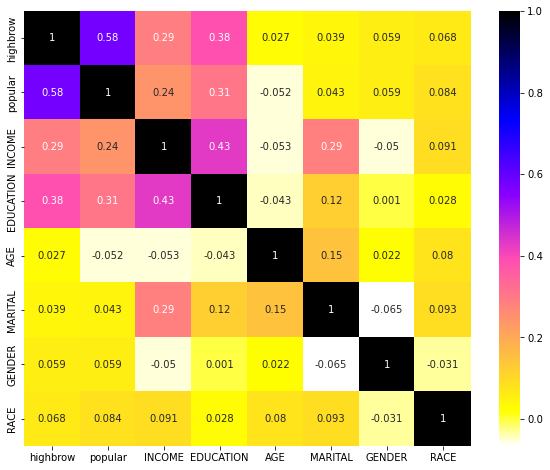

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(data_12.corr(), annot=True, cmap="gnuplot2_r");

<center><h2>SPPA - 2002</h2></center>

In [8]:
df_02 = pd.read_stata('2002_SPPA.dta')

In [9]:
df_02.head().T[:10]

,0,1,2,3,4
PERSID,12002,22002,32002,42002,52002
MONTH,AUGUST,AUGUST,AUGUST,AUGUST,AUGUST
YEAR,2002,2002,2002,2002,2002
LANGUAGE,-1,-1,-1,-1,-1
OWN_RENT,RENTED FOR CASH,RENTED FOR CASH,RENTED FOR CASH,RENTED FOR CASH,RENTED FOR CASH
HOUSING,"HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT","HOUSE , APARTMENT, FLAT"
TELEPHONE,NO,YES,YES,YES,YES
INCOME,"5,000 TO 7,499","20,000 TO 24,999","5,000 TO 7,499","LESS THAN $5,000","20,000 TO 24,999"
HHSIZE,1,4,6,2,4
REGION,MIDWEST,MIDWEST,MIDWEST,MIDWEST,MIDWEST


### Predictor Variables

In [200]:
### Family Income

In [201]:
df_02.INCOME.value_counts().sort_index()

-3                  1589
-2                   163
LESS THAN $5,000     374
5,000 TO 7,499       392
7,500 TO 9,999       419
10,000 TO 12,499     571
12,500 TO 14,999     514
15,000 TO 19,999     882
20,000 TO 24,999    1101
25,000 TO 29,999    1032
30,000 TO 34,999     993
35,000 TO 39,999    1055
40,000 TO 49,999    1513
50,000 TO 59,999    1462
60,000 TO 74,999    1477
75,000 OR MORE      3598
Name: INCOME, dtype: int64

In [202]:
def convert_income_02(x):
    if x == 'LESS THAN $5,000':x = 3000
    elif x == '5,000 TO 7,499':x = 6250
    elif x == '7,500 TO 9,999':x = 8750
    elif x == '10,000 TO 12,499':x = 11250
    elif x == '12,500 TO 14,999':x = 13750
    elif x == '15,000 TO 19,999':x = 17500
    elif x == '20,000 TO 24,999':x = 22500
    elif x == '25,000 TO 29,999':x = 27500
    elif x == '30,000 TO 34,999':x = 32500
    elif x == '35,000 TO 39,999':x = 37500
    elif x == '40,000 TO 49,999':x = 45000
    elif x == '50,000 TO 59,999':x = 55000
    elif x == '60,000 TO 74,999':x = 67500
    elif x == '75,000 OR MORE':x = 100000
    else: x = np.nan
    return x

In [203]:
df_02.INCOME = df_02.INCOME.apply(convert_income_02)

In [204]:
df_02.INCOME.value_counts(dropna=False).sort_index()

3000.0       374
6250.0       392
8750.0       419
11250.0      571
13750.0      514
17500.0      882
22500.0     1101
27500.0     1032
32500.0      993
37500.0     1055
45000.0     1513
55000.0     1462
67500.0     1477
100000.0    3598
NaN         1752
Name: INCOME, dtype: int64

In [205]:
### Age of Respondent

In [206]:
df_02.AGE.value_counts(dropna=False)

80    790
42    398
38    393
44    390
40    378
     ... 
73    153
77    150
74    144
79    123
78    117
Name: AGE, Length: 63, dtype: int64

In [207]:
df_02.AGE = df_02.AGE.astype('float64')

In [208]:
df_02.AGE.value_counts(dropna=False).sort_index()

18.0    254
19.0    238
20.0    266
21.0    212
22.0    248
       ... 
76.0    154
77.0    150
78.0    117
79.0    123
80.0    790
Name: AGE, Length: 63, dtype: int64

In [209]:
### Marital Status

In [210]:
df_02.MARITAL.value_counts(dropna=False).sort_index()

MARRIED                    9649
MARRIED - SPOUSE ABSENT     208
WIDOWED                    1378
DIVORCED                   1902
SEPARATED                   411
NEVER MARRIED              3587
Name: MARITAL, dtype: int64

In [211]:
def convert_marital_02(x):
    if x == 'MARRIED':x = 1
    elif x == 'MARRIED - SPOUSE ABSENT':x = 1
    elif x == 'WIDOWED':x = 0
    elif x == 'DIVORCED':x = 0
    elif x == 'SEPARATED':x = 0
    elif x == 'NEVER MARRIED':x = 0
    return x

In [212]:
df_02.MARITAL = df_02.MARITAL.apply(convert_marital_02)

In [213]:
df_02.MARITAL.value_counts(dropna=False).sort_index()

0    7278
1    9857
Name: MARITAL, dtype: int64

In [214]:
### Gender

In [215]:
df_02.GENDER.value_counts()

Female    9432
Male      7703
Name: GENDER, dtype: int64

In [216]:
df_02.GENDER.replace({'Female': 1, 'Male': 0}, inplace=True)

In [217]:
df_02.GENDER.value_counts()

1    9432
0    7703
Name: GENDER, dtype: int64

In [218]:
### Education

In [219]:
df_02.EDUCATION.value_counts().sort_index()

LESS THAN 9TH GRADE          935
SOME HIGH SCHOOL            1588
HIGH SCHOOL GRAD (GED)      5428
SOME COLLEGE                4738
COLLEGE GRADUATE            2933
ADVANCED GRADUATE DEGREE    1513
Name: EDUCATION, dtype: int64

In [220]:
def convert_education_02(x):
    if x == 'LESS THAN 9TH GRADE':x = 7
    elif x == 'SOME HIGH SCHOOL':x = 10
    elif x == 'HIGH SCHOOL GRAD (GED)':x = 12
    elif x == 'SOME COLLEGE':x = 13
    elif x == 'COLLEGE GRADUATE':x = 16
    elif x == 'ADVANCED GRADUATE DEGREE':x = 18
    return x

In [221]:
df_02.EDUCATION = df_02.EDUCATION.apply(convert_education_02)

In [222]:
df_02.EDUCATION = df_02.EDUCATION.astype('float64')

In [223]:
df_02.EDUCATION.value_counts().sort_index()

7.0      935
10.0    1588
12.0    5428
13.0    4738
16.0    2933
18.0    1513
Name: EDUCATION, dtype: int64

In [224]:
### Race

In [225]:
df_02.RACE.value_counts()

White Only                                 14717
Black Only                                  1554
Asian or Hawaiian/Pacific Islander Only      667
American Indian, Alaskan Native Only         197
Name: RACE, dtype: int64

In [226]:
def convert_race_02(x):
    if x == 'White Only':x = 1
    else: x = 0
    return x

In [227]:
df_02.RACE = df_02.RACE.apply(convert_race_02)

In [228]:
df_02.RACE.value_counts()

1    14717
0     2418
Name: RACE, dtype: int64

### Highbrow Cultural Activities

In [229]:
### Jazz

In [230]:
df_02.JAZZ.value_counts()

NO            15296
YES            1779
DON'T KNOW       55
REFUSED           5
Name: JAZZ, dtype: int64

In [231]:
### Classical Music

In [232]:
df_02.CLASSICAL.value_counts()

NO            15063
YES            2011
DON'T KNOW       57
REFUSED           4
Name: CLASSICAL, dtype: int64

In [233]:
### Opera

In [234]:
df_02.OPERA.value_counts()

NO            16571
YES             511
DON'T KNOW       50
REFUSED           3
Name: OPERA, dtype: int64

In [235]:
### Musical Stage Play

In [236]:
df_02.MUSICAL.value_counts()

NO            14144
YES            2931
DON'T KNOW       59
REFUSED           1
Name: MUSICAL, dtype: int64

In [237]:
### Nonmusical Stage Play

In [238]:
df_02.PLAY.value_counts()

NO            14943
YES            2134
DON'T KNOW       56
REFUSED           2
Name: PLAY, dtype: int64

In [239]:
### Ballet

In [240]:
df_02.BALLET.value_counts()

NO            16439
YES             642
DON'T KNOW       53
REFUSED           1
Name: BALLET, dtype: int64

In [241]:
### Artmuseum Visit

In [242]:
df_02.ARTMUSEUM.value_counts()

NO            12441
YES            4612
DON'T KNOW       78
REFUSED           4
Name: ARTMUSEUM, dtype: int64

In [243]:
def convert_highbrow_02(x):
    if x == "DON'T KNOW":x = np.nan
    elif x == 'REFUSED':x = np.nan
    elif x == 'YES':x = 1
    elif x == 'NO':x = 0
    return x

In [244]:
df_02[['JAZZ','CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']] = df_02[['JAZZ', 'CLASSICAL', 
                        'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']].applymap(convert_highbrow_02)

In [245]:
df_02.JAZZ.value_counts(dropna=False)

0.0    15296
1.0     1779
NaN       60
Name: JAZZ, dtype: int64

In [246]:
df_02.CLASSICAL.value_counts(dropna=False)

0.0    15063
1.0     2011
NaN       61
Name: CLASSICAL, dtype: int64

In [247]:
df_02.OPERA.value_counts(dropna=False)

0.0    16571
1.0      511
NaN       53
Name: OPERA, dtype: int64

In [248]:
df_02.MUSICAL.value_counts(dropna=False)

0.0    14144
1.0     2931
NaN       60
Name: MUSICAL, dtype: int64

In [249]:
df_02.PLAY.value_counts(dropna=False)

0.0    14943
1.0     2134
NaN       58
Name: PLAY, dtype: int64

In [250]:
df_02.BALLET.value_counts(dropna=False)

0.0    16439
1.0      642
NaN       54
Name: BALLET, dtype: int64

In [251]:
df_02.ARTMUSEUM.value_counts(dropna=False)

0.0    12441
1.0     4612
NaN       82
Name: ARTMUSEUM, dtype: int64

In [252]:
pg.cronbach_alpha(data=df_02[['JAZZ','CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']])

(0.717840440578405, array([0.711, 0.724]))

<p>The general rule of thumb is that a Cronbach's alpha of 0.70 and above is good. So, I will continue with this index.</p>

In [255]:
df_02['highbrow'] = np.apply_along_axis(combine, axis = 1, arr = 
                            df_02[['JAZZ','CLASSICAL', 'OPERA', 'MUSICAL', 'PLAY', 'BALLET', 'ARTMUSEUM']].values)

In [256]:
df_02['highbrow'].value_counts(dropna=False)

0.0    10283
1.0     3047
2.0     1579
3.0     1047
4.0      643
5.0      316
6.0      131
7.0       48
NaN       41
Name: highbrow, dtype: int64

<div class="alert alert-block alert-info">
<p>In the 2002 SPPA data set, there is not enough variables that I can use to create a popular cultural participation index. Therefore, for the 2002 SPPA data set, only a highbrow cultural participation index was created.</p></div>

In [257]:
data_02 = df_02[['highbrow', 'INCOME', 'EDUCATION', 'AGE', 'MARITAL', 'GENDER', 'RACE']]

In [258]:
data_02.head()

,highbrow,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,6250.0,7.0,74.0,0,1,0
1,1.0,22500.0,12.0,68.0,0,1,0
2,0.0,6250.0,10.0,50.0,0,1,0
3,0.0,3000.0,12.0,33.0,0,1,0
4,0.0,22500.0,10.0,19.0,0,0,0


In [259]:
data_02.isnull().sum()

highbrow       41
INCOME       1752
EDUCATION       0
AGE             0
MARITAL         0
GENDER          0
RACE            0
dtype: int64

In [260]:
data_02 = data_02.dropna()

In [261]:
data_02.head()

,highbrow,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,6250.0,7.0,74.0,0,1,0
1,1.0,22500.0,12.0,68.0,0,1,0
2,0.0,6250.0,10.0,50.0,0,1,0
3,0.0,3000.0,12.0,33.0,0,1,0
4,0.0,22500.0,10.0,19.0,0,0,0


In [262]:
data_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15355 entries, 0 to 17134
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   highbrow   15355 non-null  float64
 1   INCOME     15355 non-null  float64
 2   EDUCATION  15355 non-null  float64
 3   AGE        15355 non-null  float64
 4   MARITAL    15355 non-null  int64  
 5   GENDER     15355 non-null  int64  
 6   RACE       15355 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 959.7 KB


In [263]:
data_02[['MARITAL', 'GENDER', 'RACE']] = data_02[['MARITAL', 'GENDER', 'RACE']].astype('float64')

In [264]:
data_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15355 entries, 0 to 17134
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   highbrow   15355 non-null  float64
 1   INCOME     15355 non-null  float64
 2   EDUCATION  15355 non-null  float64
 3   AGE        15355 non-null  float64
 4   MARITAL    15355 non-null  float64
 5   GENDER     15355 non-null  float64
 6   RACE       15355 non-null  float64
dtypes: float64(7)
memory usage: 959.7 KB


In [265]:
data_02.describe()

,highbrow,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
count,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000,15355.000000
mean,0.870987,49970.661022,13.070270,46.180397,0.577141,0.548942,0.859915
std,1.364796,32342.480223,2.618697,16.899164,0.494030,0.497615,0.347086
min,0.000000,3000.000000,7.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,22500.000000,12.000000,33.000000,0.000000,0.000000,1.000000
50%,0.000000,45000.000000,13.000000,44.000000,1.000000,1.000000,1.000000
75%,1.000000,67500.000000,16.000000,58.000000,1.000000,1.000000,1.000000
max,7.000000,100000.000000,18.000000,80.000000,1.000000,1.000000,1.000000


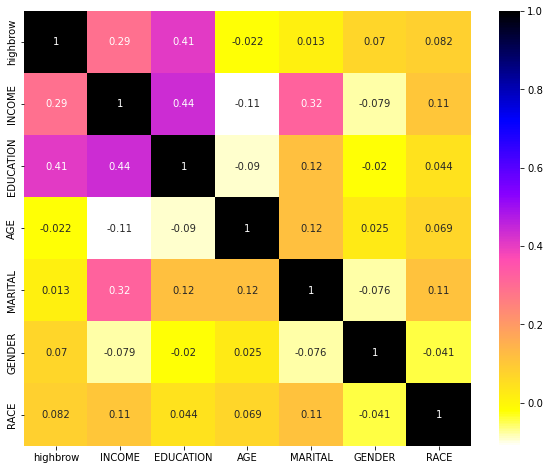

In [266]:
plt.figure(figsize=(10,8))
sns.heatmap(data_02.corr(), annot=True, cmap="gnuplot2_r");

<div class="alert alert-block alert-success">
<center><h2>Statistical Analysis Phase</h2></center></div>

### 1. Highbrow Cultural Participation

In [267]:
data_02.highbrow.mean(), data_12.highbrow.mean(), data_17.highbrow.mean()

(0.8709866492999023, 0.7271107150813099, 0.7641305583987262)

In [268]:
# Assuming normality
stats.f_oneway(data_17.highbrow, data_12.highbrow, data_02.highbrow)

F_onewayResult(statistic=52.95049253806401, pvalue=1.078368283465437e-23)

In [269]:
# 2002 vs. 2012
levene = stats.levene(data_02.highbrow, data_12.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=101.66375001277486, pvalue=7.119712540344678e-24)

In [270]:
# 2002 vs. 2012
stats.ttest_ind(data_02.highbrow, data_12.highbrow, equal_var=False)

Ttest_indResult(statistic=10.006861445439398, pvalue=1.5426264257367568e-23)

In [271]:
# 2002 vs. 2017
levene = stats.levene(data_02.highbrow, data_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=35.88919836832888, pvalue=2.118201218552845e-09)

In [272]:
# 2002 vs. 2017
stats.ttest_ind(data_02.highbrow, data_17.highbrow, equal_var=False)

Ttest_indResult(statistic=6.098953410496783, pvalue=1.0879557375635377e-09)

In [273]:
# 2012 vs. 2017
levene = stats.levene(data_12.highbrow, data_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=5.165074917672938, pvalue=0.023053361729652697)

In [274]:
# 2012 vs. 2017
stats.ttest_ind(data_12.highbrow, data_17.highbrow, equal_var=False)

Ttest_indResult(statistic=-2.248507558902831, pvalue=0.024556611811605778)

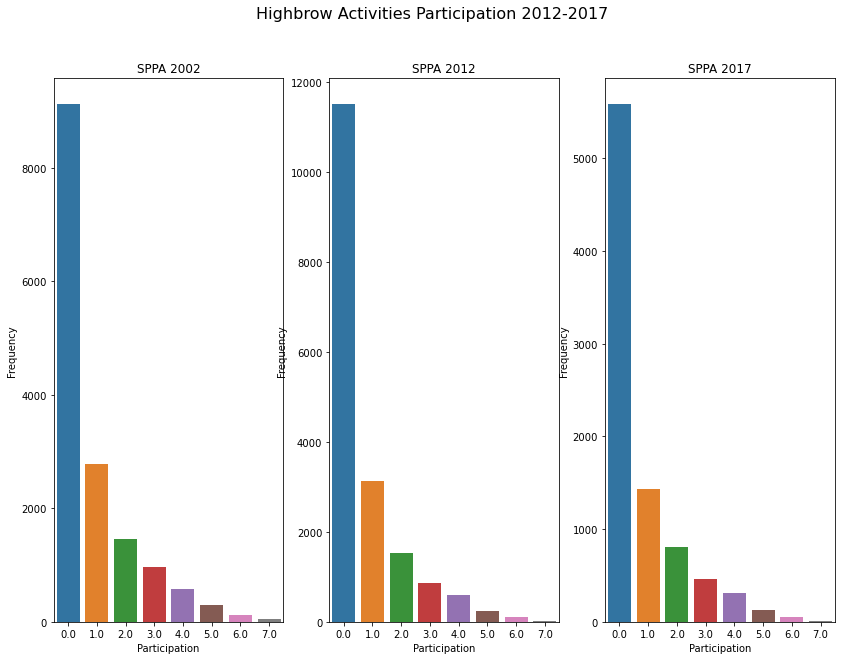

In [275]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14,10))
sns.countplot('highbrow', data=data_02, ax=ax[0])
ax[0].set(xlabel="Participation", ylabel='Frequency', title='SPPA 2002')
sns.countplot('highbrow', data=data_12, ax=ax[1])
ax[1].set(xlabel="Participation", ylabel='Frequency', title='SPPA 2012')
sns.countplot('highbrow', data=data_17, ax=ax[2])
ax[2].set(xlabel="Participation", ylabel='Frequency', title='SPPA 2017')
plt.suptitle('Highbrow Activities Participation 2012-2017', fontsize=16)
plt.tight_layout;

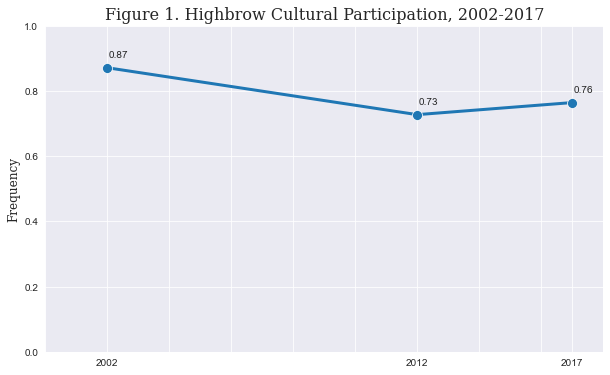

In [276]:
sns.set_style('dark')
fig = plt.figure(figsize=(10,6))

year = [2002,2012,2017]
value = [data_02.highbrow.mean(), data_12.highbrow.mean(), data_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value, linewidth=3, marker='o', markersize=10) 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=1)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.03, value[i]+0.03, round(value[i],2))
    
plt.title('Figure 1. Highbrow Cultural Participation, 2002-2017', fontdict={'fontsize':16, 'fontfamily':'serif'},
          ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

# plt.savefig('test.pdf');

<div class="alert alert-block alert-info">
<p>The decline in the frequency of highbrow cultural participation is statistically significant between 2002 and 2012.The increase in the frequency of participation from 2012 to 2017 is also statistically significant, albeit a small increase.</p></div>

### 2. Popular Activities Participation

In [277]:
data_12.popular.mean(), data_17.popular.mean()

(0.8319224771664068, 0.9006027521892415)

In [278]:
# 2012 vs. 2017
levene = stats.levene(data_12.popular, data_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=20.794633131764616, pvalue=5.135258807349164e-06)

In [279]:
# 2012 vs. 2017
stats.ttest_ind(data_12.popular, data_17.popular, equal_var=False)

Ttest_indResult(statistic=-4.52499766737336, pvalue=6.080262643354852e-06)

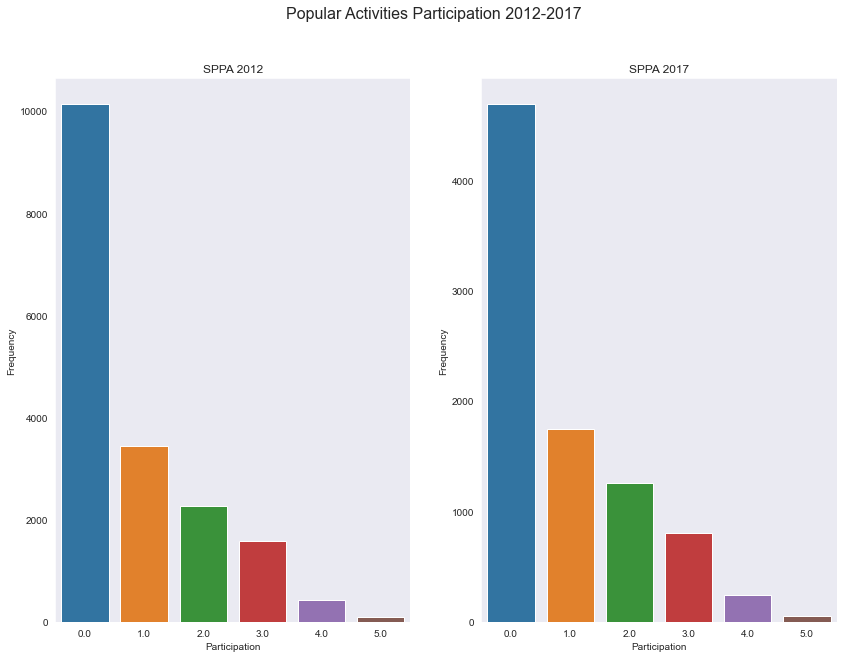

In [280]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,10))
sns.countplot('popular', data=data_12, ax=ax[0])
ax[0].set(xlabel="Participation", ylabel='Frequency', title='SPPA 2012')
sns.countplot('popular', data=data_17, ax=ax[1])
ax[1].set(xlabel="Participation", ylabel='Frequency', title='SPPA 2017')
plt.suptitle('Popular Activities Participation 2012-2017', fontsize=16)
plt.tight_layout;

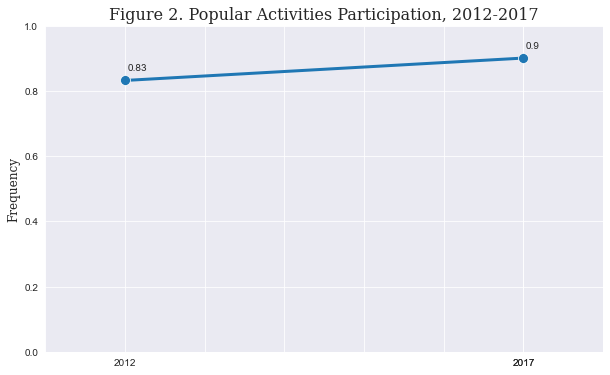

In [281]:
sns.set_style('dark')
fig = plt.figure(figsize=(10,6))

year = [2012,2017]
value = [data_12.popular.mean(), data_17.popular.mean()]

ax = sns.lineplot(x=year, y=value, linewidth=3, marker='o', markersize=10) 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=1)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.03, value[i]+0.03, round(value[i],2))
    
plt.title('Figure 2. Popular Activities Participation, 2012-2017', fontdict={'fontsize':16, 'fontfamily':'serif'},
          ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

# plt.savefig('test.pdf');

<div class="alert alert-block alert-info">
<p>There is a statistically significant increase in the frequency of popular cultural participation from 2012 to 2017.</p></div>

### 3. The Trend of Highbrow/Popular Activities Participation, 2002-2017

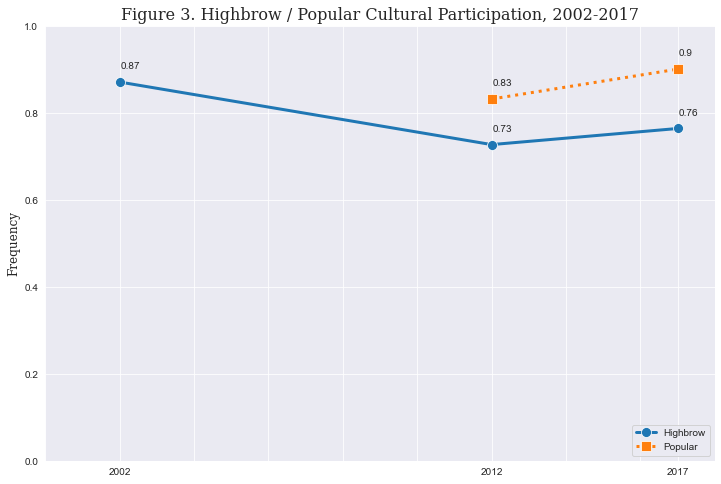

In [332]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
value1 = [data_02.highbrow.mean(), data_12.highbrow.mean(), data_17.highbrow.mean()]
year2 = [2012,2017]
value2 = [data_12.popular.mean(), data_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value1, linewidth=3, marker='o', markersize=10, label='Highbrow') 
ax = sns.lineplot(x=year2, y=value2, linewidth=3, marker='s', linestyle=':', markersize=10, label='Popular') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=1)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.03, value1[i]+0.03, round(value1[i],2))
for i in range(len(year2)):
    plt.text(year2[i]+0.03, value2[i]+0.03, round(value2[i],2))
    
plt.title('Figure 3. Highbrow / Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=4)
plt.grid()

# plt.savefig('test.pdf');

<div class="alert alert-block alert-info">
<p>During the ten-year period between 2002 and 2012 highbrow cultural participation declined significantly. After 2012, though, it increased significantly, albeit a slight increase. This might indicate that highbrow cultural participation might be losing its significance as a status marker for upper class people. The increase in popular cultural participation, on the other hand, might be indicating another important conclusion. In line with the omnivorousness thesis, we know that highbrow cultural participation should be used in conjunction with other types of cultural participation in order to have the same distinguishing and status-creating power that it once did. This might be the case here.</p></div>

### 4. The Relationship Between the Predictor Variables and the Participation Indexes

In [288]:
data_17.head(1)

,highbrow,popular,HEFAMINC,PEEDUCA,PRTAGE,PEMARITL,PESEX,PTDTRACE
43,0.0,0.0,87500.0,11.0,48.0,1.0,1.0,1.0


In [289]:
data_12.head(1)

,highbrow,popular,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,0.0,13750.0,7.0,67.0,0.0,1.0,1.0


In [290]:
data_02.head(1)

,highbrow,INCOME,EDUCATION,AGE,MARITAL,GENDER,RACE
0,0.0,6250.0,7.0,74.0,0.0,1.0,0.0


### 4.1. Family Income

#### Highbrow Activities

In [291]:
### 2017

In [292]:
data_17.HEFAMINC.describe()

count      8793.000000
mean      68935.346298
std       55994.223722
min        3000.000000
25%       27500.000000
50%       55000.000000
75%       87500.000000
max      200000.000000
Name: HEFAMINC, dtype: float64

In [293]:
stats.pearsonr(data_17.HEFAMINC, data_17.highbrow)

(0.26590547477954407, 3.328152950527826e-142)

In [294]:
stats.pearsonr(data_17.HEFAMINC, data_17.popular)

(0.24985590039990005, 3.0052868266134224e-125)

In [295]:
low_income_17 = data_17[data_17.HEFAMINC < 27500]
middle_income_17 = data_17[(data_17.HEFAMINC >= 27500) & (data_17.HEFAMINC < 87500)]
high_income_17 = data_17[data_17.HEFAMINC >= 87500]

In [296]:
### 2012

In [297]:
data_12.INCOME.describe()

count     17956.000000
mean      66595.037870
std       52918.086736
min        3000.000000
25%       27500.000000
50%       55000.000000
75%       87500.000000
max      200000.000000
Name: INCOME, dtype: float64

In [298]:
stats.pearsonr(data_12.INCOME, data_12.highbrow)

(0.29198249838476975, 0.0)

In [299]:
stats.pearsonr(data_12.INCOME, data_12.popular)

(0.24323300344212478, 4.2661659328218515e-240)

In [300]:
low_income_12 = data_12[data_12.INCOME < 27500]
middle_income_12 = data_12[(data_12.INCOME >= 27500) & (data_12.INCOME < 87500)]
high_income_12 = data_12[data_12.INCOME >= 87500]

In [301]:
### 2002

In [302]:
data_02.INCOME.describe()

count     15355.000000
mean      49970.661022
std       32342.480223
min        3000.000000
25%       22500.000000
50%       45000.000000
75%       67500.000000
max      100000.000000
Name: INCOME, dtype: float64

In [303]:
stats.pearsonr(data_02.INCOME, data_02.highbrow)

(0.2900840325243771, 1.9732912202818663e-295)

In [305]:
low_income_02 = data_02[data_02.INCOME < 22500]
middle_income_02 = data_02[(data_02.INCOME >= 22500) & (data_02.INCOME < 67500)]
high_income_02 = data_02[data_02.INCOME >= 67500]

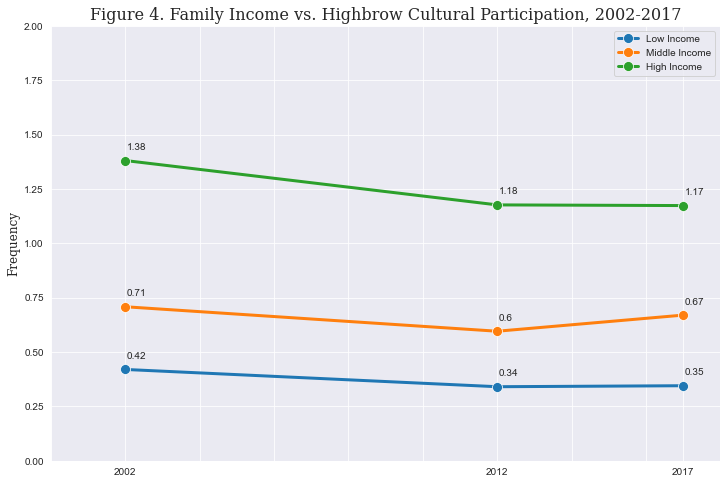

In [313]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [low_income_02.highbrow.mean(), low_income_12.highbrow.mean(), low_income_17.highbrow.mean()]
value2 = [middle_income_02.highbrow.mean(), middle_income_12.highbrow.mean(), middle_income_17.highbrow.mean()]
value3 = [high_income_02.highbrow.mean(), high_income_12.highbrow.mean(), high_income_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Income') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Income')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Income') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.05, value1[i]+0.05, round(value1[i],2))
    plt.text(year[i]+0.05, value2[i]+0.05, round(value2[i],2))
    plt.text(year[i]+0.05, value3[i]+0.05, round(value3[i],2))
    
plt.title('Figure 4. Family Income vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
# plt.savefig('test.pdf');

In [314]:
# 2002 vs. 2017 - High Income
levene = stats.levene(high_income_02.highbrow, high_income_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=9.228985030982294, pvalue=0.0023898205374399)

In [315]:
# 2002 vs. 2017 - High Income
stats.ttest_ind(high_income_02.highbrow, high_income_17.highbrow, equal_var=False)

Ttest_indResult(statistic=5.833862906225423, pvalue=5.675776904841045e-09)

In [316]:
# 2002 vs. 2017 - Middle Income
levene = stats.levene(middle_income_02.highbrow, middle_income_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=2.529398163834687, pvalue=0.1117716100953693)

In [317]:
# 2002 vs. 2017 - Middle Income
stats.ttest_ind(middle_income_02.highbrow, middle_income_17.highbrow)

Ttest_indResult(statistic=1.590408175228827, pvalue=0.11177161009704265)

In [318]:
# 2012 vs. 2017 - Middle Income
levene = stats.levene(middle_income_12.highbrow, middle_income_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=11.067372675723956, pvalue=0.0008812518357766105)

In [319]:
# 2012 vs. 2017 - Middle Income
stats.ttest_ind(middle_income_12.highbrow, middle_income_17.highbrow, equal_var=False)

Ttest_indResult(statistic=-3.231994420476485, pvalue=0.0012349738432347757)

In [320]:
# 2002 vs. 2017 - Low Income
levene = stats.levene(low_income_02.highbrow, low_income_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=8.037264878636766, pvalue=0.004600289972187261)

In [321]:
# 2002 vs. 2017 - Low Income
stats.ttest_ind(low_income_02.highbrow, low_income_17.highbrow, equal_var=False)

Ttest_indResult(statistic=2.9273047191871755, pvalue=0.0034354634494390495)

<div class="alert alert-block alert-info">
<p>The participation frequency of the high-income group significantly decreased between 2002 and 2017, but there is not any statistically significant change between 2012 and 2017 for this group.<br>The participation frequency of the middle-income group significantly decreased between 2002 and 2012 and significantly increased between 2012 and 2017. Overall, this group's participation frequency did not significantly change between 2002 and 2017.<br>The participation frequency of the low-income group significantly declined between 2002 and 2017, but there is not any statistically significant change for this group between 2012 and 2017.</p></div>

#### Popular Activities

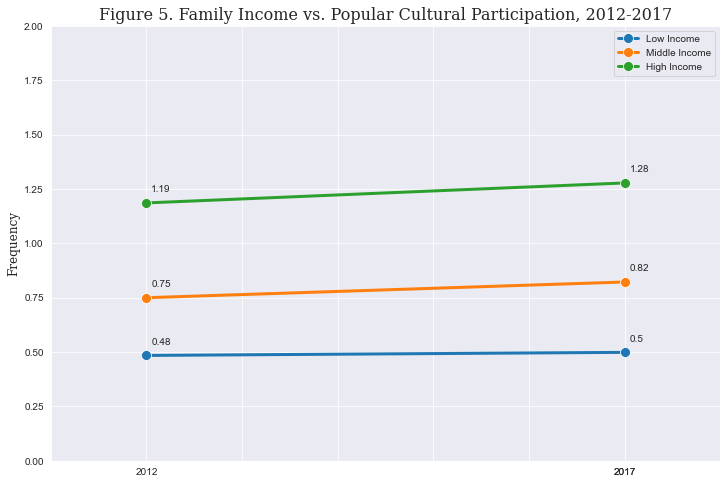

In [323]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [low_income_12.popular.mean(), low_income_17.popular.mean()]
value2 = [middle_income_12.popular.mean(), middle_income_17.popular.mean()]
value3 = [high_income_12.popular.mean(), high_income_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Income') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Income')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Income') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.05, value1[i]+0.05, round(value1[i],2))
    plt.text(year[i]+0.05, value2[i]+0.05, round(value2[i],2))
    plt.text(year[i]+0.05, value3[i]+0.05, round(value3[i],2))
    
plt.title('Figure 5. Family Income vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [324]:
# 2012 vs. 2017 - High Income
levene = stats.levene(high_income_12.popular, high_income_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.9815332341297981, pvalue=0.32184792922232075)

In [325]:
# 2012 vs. 2017 - High Income
stats.ttest_ind(high_income_12.popular, high_income_17.popular)

Ttest_indResult(statistic=-3.208457021595755, pvalue=0.0013392962105685594)

In [326]:
# 2012 vs. 2017 - Middle Income
levene = stats.levene(middle_income_12.popular, middle_income_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=11.188917858171376, pvalue=0.0008254068500932264)

In [327]:
# 2012 vs. 2017 - Middle Income
stats.ttest_ind(middle_income_12.popular, middle_income_17.popular, equal_var=False)

Ttest_indResult(statistic=-3.3129853099572877, pvalue=0.0009275149322358074)

In [328]:
# 2012 vs. 2017 - Low Income
levene = stats.levene(low_income_12.popular, low_income_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.3148873514601558, pvalue=0.5747173165960371)

In [329]:
# 2012 vs. 2017 - Low Income
stats.ttest_ind(low_income_12.popular, low_income_17.popular)

Ttest_indResult(statistic=-0.5611482437468337, pvalue=0.5747173165985358)

<div class="alert alert-block alert-info">
<p>There is a statistically significant change for the high-income group.<br>The participation frequency of the middle-income group significantly increased between 2012 and 2017.<br>There is not any statistically significant change for the low-income group.</p></div>

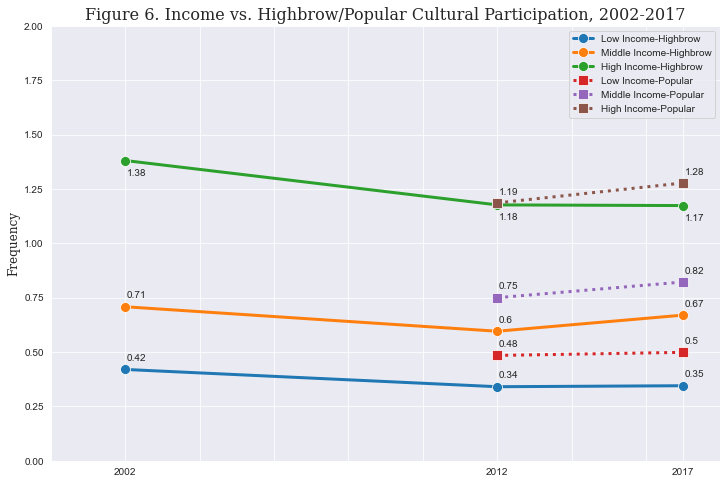

In [371]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]
value_h1 = [low_income_02.highbrow.mean(), low_income_12.highbrow.mean(), low_income_17.highbrow.mean()]
value_h2 = [middle_income_02.highbrow.mean(), middle_income_12.highbrow.mean(), middle_income_17.highbrow.mean()]
value_h3 = [high_income_02.highbrow.mean(), high_income_12.highbrow.mean(), high_income_17.highbrow.mean()]
value_p1 = [low_income_12.popular.mean(), low_income_17.popular.mean()]
value_p2 = [middle_income_12.popular.mean(), middle_income_17.popular.mean()]
value_p3 = [high_income_12.popular.mean(), high_income_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Low Income-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Middle Income-Highbrow')
ax = sns.lineplot(x=year1, y=value_h3, linewidth=3, marker='o', markersize=10, label='High Income-Highbrow') 
ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Low Income-Popular',) 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Middle Income-Popular')
ax = sns.lineplot(x=year2, y=value_p3, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='High Income-Popular') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.04, value_h1[i]+0.04, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]+0.04, round(value_h2[i],2))
    plt.text(year1[i]+0.04, value_h3[i]-0.07, round(value_h3[i],2))
for i in range(len(year2)):
    plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]+0.04, round(value_p2[i],2)) 
    plt.text(year2[i]+0.04, value_p3[i]+0.04, round(value_p3[i],2)) 
    
plt.title('Figure 6. Income vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

### 4.2 Education

#### Highbrow Activities

In [335]:
# 2017

In [336]:
data_17.PEEDUCA.describe()

count    8793.000000
mean       13.708973
std         2.790295
min         1.000000
25%        12.000000
50%        13.000000
75%        16.000000
max        20.000000
Name: PEEDUCA, dtype: float64

In [337]:
stats.pearsonr(data_17.PEEDUCA, data_17.highbrow)

(0.3758676532358335, 4.0455856562758904e-293)

In [338]:
stats.pearsonr(data_17.PEEDUCA, data_17.popular)

(0.3105712224010254, 6.541303294199111e-196)

In [339]:
low_educ_17 = data_17[data_17.PEEDUCA < 12]
middle_educ_17 = data_17[(data_17.PEEDUCA >= 12) & (data_17.PEEDUCA < 16)]
high_educ_17 = data_17[data_17.PEEDUCA >= 16]

In [340]:
# 2012

In [341]:
data_12.EDUCATION.describe()

count    17956.000000
mean        13.406772
std          2.578070
min          7.000000
25%         12.000000
50%         13.000000
75%         16.000000
max         18.000000
Name: EDUCATION, dtype: float64

In [342]:
stats.pearsonr(data_12.EDUCATION, data_12.highbrow)

(0.38498317490238476, 0.0)

In [343]:
stats.pearsonr(data_12.EDUCATION, data_12.popular)

(0.3057681264049992, 0.0)

In [344]:
low_educ_12 = data_12[data_12.EDUCATION < 12]
middle_educ_12 = data_12[(data_12.EDUCATION >= 12) & (data_12.EDUCATION < 16)]
high_educ_12 = data_12[data_12.EDUCATION >= 16]

In [345]:
# 2002

In [346]:
data_02.EDUCATION.describe()

count    15355.000000
mean        13.070270
std          2.618697
min          7.000000
25%         12.000000
50%         13.000000
75%         16.000000
max         18.000000
Name: EDUCATION, dtype: float64

In [369]:
stats.pearsonr(data_02.EDUCATION, data_02.highbrow)

(0.40997175126227264, 0.0)

In [348]:
low_educ_02 = data_02[data_02.EDUCATION < 12]
middle_educ_02 = data_02[(data_02.EDUCATION >= 12) & (data_02.EDUCATION < 16)]
high_educ_02 = data_02[data_02.EDUCATION >= 16]

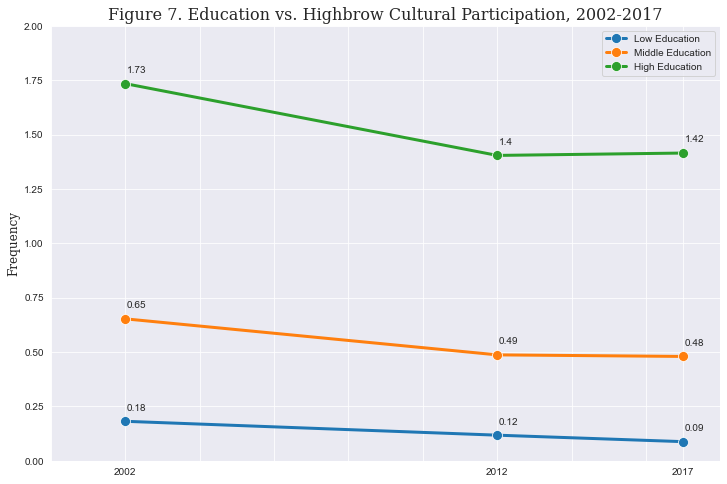

In [349]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [low_educ_02.highbrow.mean(), low_educ_12.highbrow.mean(), low_educ_17.highbrow.mean()]
value2 = [middle_educ_02.highbrow.mean(), middle_educ_12.highbrow.mean(), middle_educ_17.highbrow.mean()]
value3 = [high_educ_02.highbrow.mean(), high_educ_12.highbrow.mean(), high_educ_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Education') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Education')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Education') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.05, value1[i]+0.05, round(value1[i],2))
    plt.text(year[i]+0.05, value2[i]+0.05, round(value2[i],2))
    plt.text(year[i]+0.05, value3[i]+0.05, round(value3[i],2))
    
plt.title('Figure 7. Education vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
plt.show()

In [350]:
# 2002 vs. 2017 - High Education
levene = stats.levene(high_educ_02.highbrow, high_educ_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=16.636448889053472, pvalue=4.5772228863900245e-05)

In [351]:
# 2002 vs. 2017 - High Education
stats.ttest_ind(high_educ_02.highbrow, high_educ_17.highbrow, equal_var=False)

Ttest_indResult(statistic=8.087899399594528, pvalue=7.162685775229879e-16)

In [352]:
# 2012 vs. 2017 - High Education
stats.ttest_ind(high_educ_12.highbrow, high_educ_17.highbrow, equal_var=False)

Ttest_indResult(statistic=-0.30138142153781305, pvalue=0.7631340682556281)

In [353]:
# 2002 vs. 2017 - Middle Education
levene = stats.levene(middle_educ_02.highbrow, middle_educ_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=84.26473331504185, pvalue=4.917591923765008e-20)

In [354]:
# 2002 vs. 2017 - Middle Education
stats.ttest_ind(middle_educ_02.highbrow, middle_educ_17.highbrow, equal_var=False)

Ttest_indResult(statistic=9.612610144749166, pvalue=8.471784687321453e-22)

In [355]:
# 2012 vs. 2017 - Middle Education
stats.ttest_ind(middle_educ_12.highbrow, middle_educ_17.highbrow, equal_var=False)

Ttest_indResult(statistic=0.43889609341516134, pvalue=0.6607461917106163)

In [356]:
# 2002 vs. 2017 - Low Education
levene = stats.levene(low_educ_02.highbrow, low_educ_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=16.667127925478376, pvalue=4.573226620365704e-05)

In [357]:
# 2002 vs. 2017 - Low Education
stats.ttest_ind(low_educ_02.highbrow, low_educ_17.highbrow, equal_var=False)

Ttest_indResult(statistic=5.192922360613267, pvalue=2.2728137656567994e-07)

In [358]:
# 2012 vs. 2017 - Low Education
stats.ttest_ind(low_educ_12.highbrow, low_educ_17.highbrow)

Ttest_indResult(statistic=1.6697357158591088, pvalue=0.09508897327048406)

<div class="alert alert-block alert-info">
<p>For all education groups, there is a statistically significant decline in the participation frequencies of highbrow cultural activities between 2002 and 2017. Between 2012 and 2017, though, there is not any significant changes for any of these groups.</p></div>

#### Popular Activities

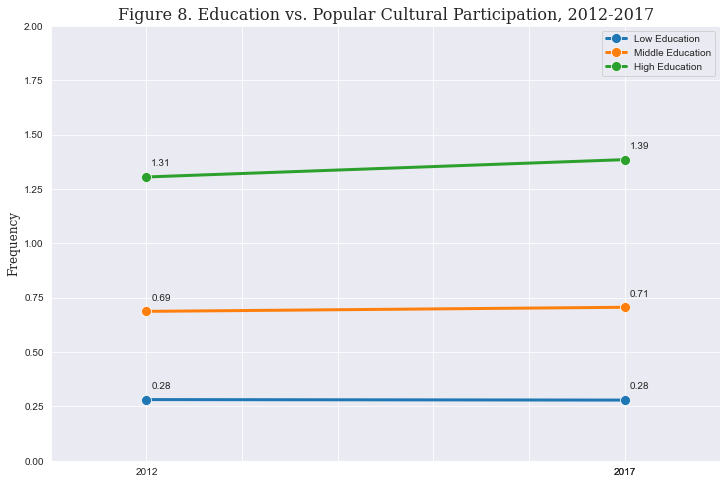

In [359]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [low_educ_12.popular.mean(), low_educ_17.popular.mean()]
value2 = [middle_educ_12.popular.mean(), middle_educ_17.popular.mean()]
value3 = [high_educ_12.popular.mean(), high_educ_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Education') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Education')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Education') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.05, value1[i]+0.05, round(value1[i],2))
    plt.text(year[i]+0.05, value2[i]+0.05, round(value2[i],2))
    plt.text(year[i]+0.05, value3[i]+0.05, round(value3[i],2))
    
plt.title('Figure 8. Education vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [360]:
# 2012 vs. 2017 - High Education
levene = stats.levene(high_educ_12.popular, high_educ_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=1.1171387588197959, pvalue=0.29056559311962893)

In [361]:
# 2012 vs. 2017 - High Education
stats.ttest_ind(high_educ_12.popular, high_educ_17.popular)

Ttest_indResult(statistic=-2.7048774472007895, pvalue=0.006846649772432961)

In [362]:
# 2012 vs. 2017 - Middle Education
levene = stats.levene(middle_educ_12.popular, middle_educ_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=1.1174162764232143, pvalue=0.2904918231988039)

In [363]:
# 2012 vs. 2017 - Middle Education
stats.ttest_ind(middle_educ_12.popular, middle_educ_17.popular)

Ttest_indResult(statistic=-1.0570791249585882, pvalue=0.2904918232001868)

In [364]:
# 2012 vs. 2017 - Low Education
levene = stats.levene(low_educ_12.popular, low_educ_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.0056116618411585625, pvalue=0.9402911196524811)

In [365]:
# 2012 vs. 2017 - Low Education
stats.ttest_ind(low_educ_12.popular, low_educ_17.popular)

Ttest_indResult(statistic=0.0749110261654355, pvalue=0.9402911196523125)

<div class="alert alert-block alert-info">
<p>For the high-education group, there is a statistically significant increase in the participation frequency of popular cultural activities between 2012 and 2017.<br>The participation frequencies of middle- and low-education groups did not statistically change between 2012 and 2017.</p></div>

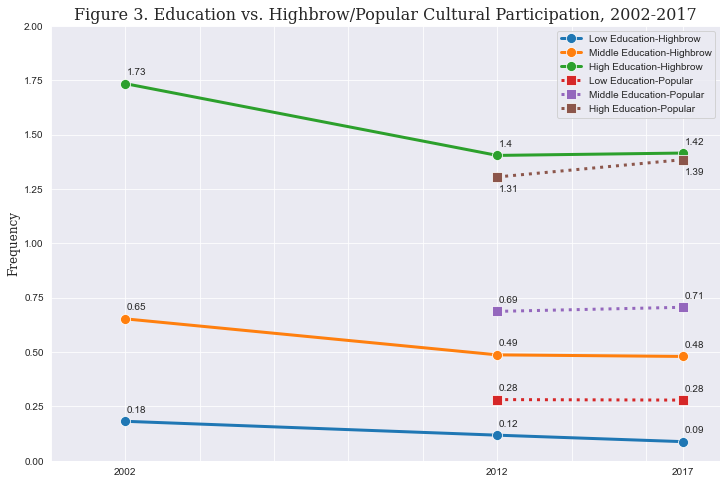

In [372]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]
value_h1 = [low_educ_02.highbrow.mean(), low_educ_12.highbrow.mean(), low_educ_17.highbrow.mean()]
value_h2 = [middle_educ_02.highbrow.mean(), middle_educ_12.highbrow.mean(), middle_educ_17.highbrow.mean()]
value_h3 = [high_educ_02.highbrow.mean(), high_educ_12.highbrow.mean(), high_educ_17.highbrow.mean()]
value_p1 = [low_educ_12.popular.mean(), low_educ_17.popular.mean()]
value_p2 = [middle_educ_12.popular.mean(), middle_educ_17.popular.mean()]
value_p3 = [high_educ_12.popular.mean(), high_educ_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Low Education-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Middle Education-Highbrow')
ax = sns.lineplot(x=year1, y=value_h3, linewidth=3, marker='o', markersize=10, label='High Education-Highbrow') 
ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Low Education-Popular') 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Middle Education-Popular')
ax = sns.lineplot(x=year2, y=value_p3, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='High Education-Popular') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.04, value_h1[i]+0.04, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]+0.04, round(value_h2[i],2))
    plt.text(year1[i]+0.04, value_h3[i]+0.04, round(value_h3[i],2))
for i in range(len(year2)):
    plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]+0.04, round(value_p2[i],2)) 
    plt.text(year2[i]+0.04, value_p3[i]-0.07, round(value_p3[i],2)) 
    
plt.title('Figure 9. Education vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

### 4.3. Age

#### Highbrow Activities

In [373]:
# 2017

In [374]:
data_17.PRTAGE.describe()

count    8793.000000
mean       51.088707
std        18.102927
min        18.000000
25%        35.000000
50%        52.000000
75%        66.000000
max        85.000000
Name: PRTAGE, dtype: float64

In [375]:
stats.pearsonr(data_17.PRTAGE, data_17.highbrow)

(-0.010464416532039217, 0.326520682125976)

In [376]:
stats.pearsonr(data_17.PRTAGE, data_17.popular)

(-0.09348358423916127, 1.5770083867261638e-18)

In [377]:
low_age_17 = data_17[data_17.PRTAGE < 35]
middle_age_17 = data_17[(data_17.PRTAGE >= 35) & (data_17.PRTAGE < 66)]
high_age_17 = data_17[data_17.PRTAGE >= 66]

In [378]:
# 2012

In [379]:
data_12.AGE.describe()

count    17956.000000
mean        49.061038
std         17.493491
min         18.000000
25%         35.000000
50%         49.000000
75%         62.000000
max         85.000000
Name: AGE, dtype: float64

In [380]:
stats.pearsonr(data_12.AGE, data_12.highbrow)

(0.02681143227280932, 0.0003267323845727905)

In [381]:
stats.pearsonr(data_12.AGE, data_12.popular)

(-0.051660379163909295, 4.309718068190207e-12)

In [382]:
low_age_12 = data_12[data_12.AGE < 35]
middle_age_12 = data_12[(data_12.AGE >= 35) & (data_12.AGE < 62)]
high_age_12 = data_12[data_12.AGE >= 62]

In [383]:
# 2002

In [384]:
data_02.AGE.describe()

count    15355.000000
mean        46.180397
std         16.899164
min         18.000000
25%         33.000000
50%         44.000000
75%         58.000000
max         80.000000
Name: AGE, dtype: float64

In [385]:
stats.pearsonr(data_02.AGE, data_02.highbrow)

(-0.022270859926063823, 0.0057833616070519876)

In [386]:
low_age_02 = data_02[data_02.AGE < 33]
middle_age_02 = data_02[(data_02.AGE >= 33) & (data_02.AGE < 58)]
high_age_02 = data_02[data_02.AGE >= 58]

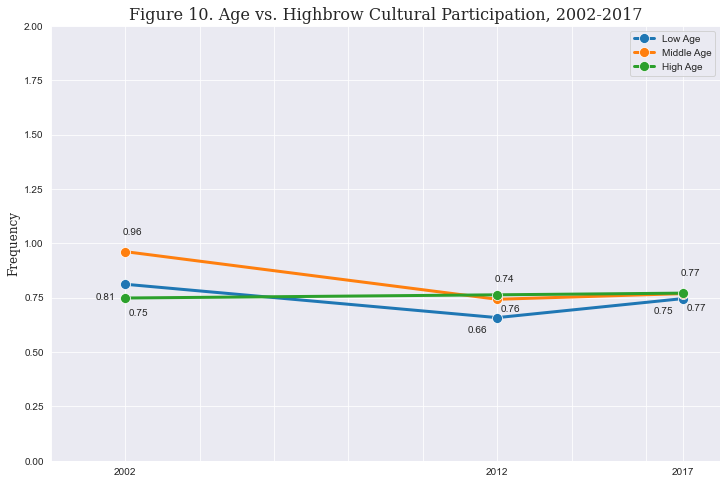

In [387]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [low_age_02.highbrow.mean(), low_age_12.highbrow.mean(), low_age_17.highbrow.mean()]
value2 = [middle_age_02.highbrow.mean(), middle_age_12.highbrow.mean(), middle_age_17.highbrow.mean()]
value3 = [high_age_02.highbrow.mean(), high_age_12.highbrow.mean(), high_age_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Age') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Age')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Age') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]-0.8, value1[i]-0.07, round(value1[i],2))
    plt.text(year[i]-0.08, value2[i]+0.08, round(value2[i],2))
    plt.text(year[i]+0.1, value3[i]-0.08, round(value3[i],2))    
    
plt.title('Figure 10. Age vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
plt.show()

In [388]:
# 2002 vs. 2017 - High Age
levene = stats.levene(high_age_02.highbrow, high_age_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.39954223591399374, pvalue=0.5273493253181493)

In [389]:
# 2002 vs. 2017 - High Age
stats.ttest_ind(high_age_02.highbrow, high_age_17.highbrow)

Ttest_indResult(statistic=-0.6320935341498074, pvalue=0.5273493253189414)

In [390]:
# 2002 vs. 2017 - Middle Age
levene = stats.levene(middle_age_02.highbrow, middle_age_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=57.320264736433835, pvalue=3.969210124742613e-14)

In [391]:
# 2002 vs. 2017 - Middle Age
stats.ttest_ind(middle_age_02.highbrow, middle_age_17.highbrow, equal_var=False)

Ttest_indResult(statistic=7.765059676673137, pvalue=8.943404423128734e-15)

In [392]:
# 2002 vs. 2017 - Low Age
levene = stats.levene(low_age_02.highbrow, low_age_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=3.600616005210891, pvalue=0.05780780605099445)

In [393]:
# 2002 vs. 2017 - Middle Age
stats.ttest_ind(low_age_02.highbrow, low_age_17.highbrow)

Ttest_indResult(statistic=1.8975289207837889, pvalue=0.05780780605099416)

<div class="alert alert-block alert-info">
<p>There is a significant decline between 2012 and 2017 for only the middle-age group. The other groups showed no changes in their participations in highbrow cultural activities.</p></div>

#### Popular Activities

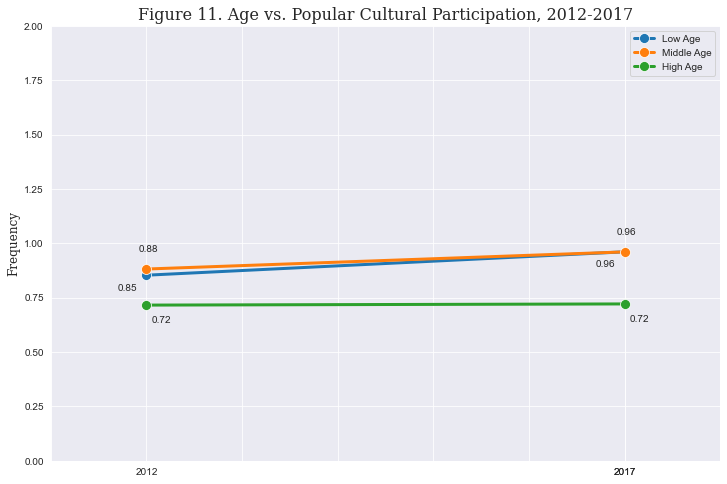

In [394]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [low_age_12.popular.mean(), low_age_17.popular.mean()]
value2 = [middle_age_12.popular.mean(), middle_age_17.popular.mean()]
value3 = [high_age_12.popular.mean(), high_age_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Low Age') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Middle Age')
ax = sns.lineplot(x=year, y=value3, linewidth=3, marker='o', markersize=10, label='High Age') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]-0.3, value1[i]-0.07, round(value1[i],2))
    plt.text(year[i]-0.08, value2[i]+0.08, round(value2[i],2))
    plt.text(year[i]+0.05, value3[i]-0.08, round(value3[i],2))     
    
plt.title('Figure 11. Age vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [395]:
# 2012 vs. 2017 - High Age
levene = stats.levene(high_age_12.popular, high_age_17.popular)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.036794481639908456, pvalue=0.847889759342012)

In [396]:
# 2012 vs. 2017 - High Age
stats.ttest_ind(high_age_12.popular, high_age_17.popular)

Ttest_indResult(statistic=-0.19181887717299476, pvalue=0.8478897593423023)

In [397]:
# 2012 vs. 2017 - Middle Age
levene = stats.levene(middle_age_12.popular, middle_age_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=13.244981201587732, pvalue=0.0002743428009096213)

In [398]:
# 2012 vs. 2017 - Middle Age
stats.ttest_ind(middle_age_12.popular, middle_age_17.popular, equal_var=False)

Ttest_indResult(statistic=-3.600157074549662, pvalue=0.00031976684226140784)

In [399]:
# 2012 vs. 2017 - Low Age
levene = stats.levene(low_age_12.popular, low_age_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=14.31891047177867, pvalue=0.00015568615204921313)

In [400]:
# 2012 vs. 2017 - Low Age
stats.ttest_ind(low_age_12.popular, low_age_17.popular, equal_var=False)

Ttest_indResult(statistic=-3.4478474207739507, pvalue=0.0005710400979667757)

<div class="alert alert-block alert-info">
<p>The participation frequencies of middle- and low-age groups in popular cultural activities significantly increased between 2012 and 2017. There is no statistically significant change for the high-age group during this period.</p></div>

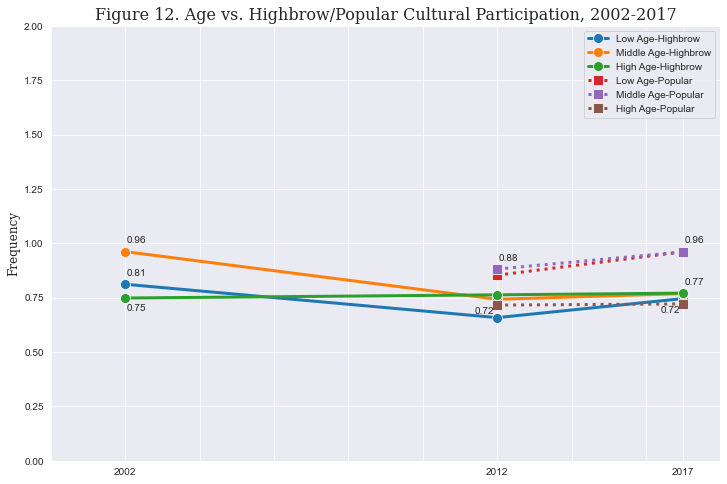

In [431]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]
value_h1 = [low_age_02.highbrow.mean(), low_age_12.highbrow.mean(), low_age_17.highbrow.mean()]
value_h2 = [middle_age_02.highbrow.mean(), middle_age_12.highbrow.mean(), middle_age_17.highbrow.mean()]
value_h3 = [high_age_02.highbrow.mean(), high_age_12.highbrow.mean(), high_age_17.highbrow.mean()]
value_p1 = [low_age_12.popular.mean(), low_age_17.popular.mean()]
value_p2 = [middle_age_12.popular.mean(), middle_age_17.popular.mean()]
value_p3 = [high_age_12.popular.mean(), high_age_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Low Age-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Middle Age-Highbrow')
ax = sns.lineplot(x=year1, y=value_h3, linewidth=3, marker='o', markersize=10, label='High Age-Highbrow') 
ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Low Age-Popular') 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='Middle Age-Popular')
ax = sns.lineplot(x=year2, y=value_p3, linewidth=3, marker='s', linestyle=':', markersize=10, 
                  label='High Age-Popular') 

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in [0]:
    plt.text(year1[i]+0.04, value_h1[i]+0.04, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]+0.04, round(value_h2[i],2))
    plt.text(year1[i]+0.04, value_h3[i]-0.06, round(value_h3[i],2))
plt.text(year1[2]+0.04, value_h3[2]+0.04, round(value_h3[2],2))
for i in range(len(year2)):
#     plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]+0.04, round(value_p2[i],2)) 
    plt.text(year2[i]-0.6, value_p3[i]-0.04, round(value_p3[i],2)) 
    
plt.title('Figure 12. Age vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

### 4.4 Marital Status

#### Highbrow Activities

In [403]:
# 2017

In [404]:
data_17.PEMARITL.describe()

count    8793.000000
mean        0.467986
std         0.499002
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: PEMARITL, dtype: float64

In [405]:
data_17.PEMARITL.value_counts()

0.0    4678
1.0    4115
Name: PEMARITL, dtype: int64

In [406]:
stats.pearsonr(data_17.PEMARITL, data_17.highbrow)

(0.04203058630899215, 8.065960689666068e-05)

In [407]:
stats.pearsonr(data_17.PEMARITL, data_17.popular)

(0.06539705509708289, 8.35425139694393e-10)

In [408]:
married_17 = data_17[data_17.PEMARITL == 1]
single_17 = data_17[data_17.PEMARITL == 0]

In [409]:
# 2012

In [410]:
stats.pearsonr(data_12.MARITAL, data_12.highbrow)

(0.038698059480421994, 2.1356904972936108e-07)

In [411]:
stats.pearsonr(data_12.MARITAL, data_12.popular)

(0.043221210041737235, 6.875144268031633e-09)

In [412]:
married_12 = data_12[data_12.MARITAL == 1]
single_12 = data_12[data_12.MARITAL == 0]

In [413]:
# 2002

In [414]:
stats.pearsonr(data_02.MARITAL, data_02.highbrow)

(0.01297437521632632, 0.10790960000771817)

In [415]:
married_02 = data_02[data_02.MARITAL == 1]
single_02 = data_02[data_02.MARITAL == 0]

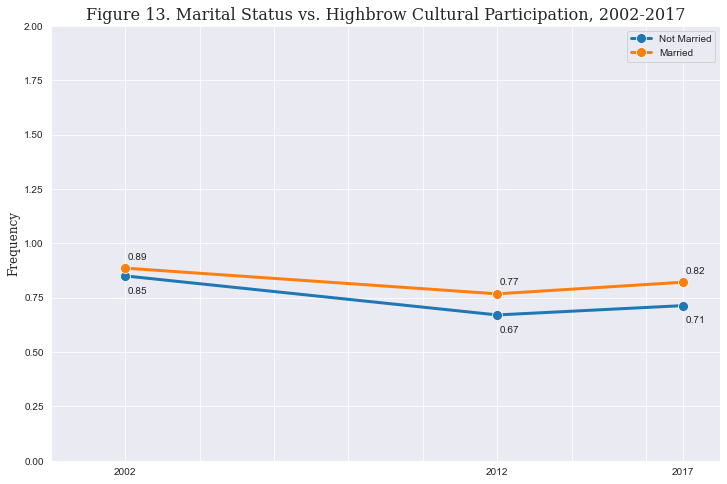

In [416]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [single_02.highbrow.mean(), single_12.highbrow.mean(), single_17.highbrow.mean()]
value2 = [married_02.highbrow.mean(), married_12.highbrow.mean(), married_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Not Married') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Married')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.06, value1[i]-0.08, round(value1[i],2))
    plt.text(year[i]+0.06, value2[i]+0.04, round(value2[i],2))
    
plt.title('Figure 13. Marital Status vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
plt.show()

In [417]:
# 2002 vs. 2017 - Married
levene = stats.levene(married_02.highbrow, married_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=6.618143014068088, pvalue=0.010105517922667763)

In [418]:
# 2002 vs. 2017 - Married
stats.ttest_ind(married_02.highbrow, married_17.highbrow, equal_var=False)

Ttest_indResult(statistic=2.614972047349379, pvalue=0.008939508957589996)

In [419]:
# 2012 vs. 2017 - Married
levene = stats.levene(married_12.highbrow, married_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=5.379225493266183, pvalue=0.02039171713671134)

In [420]:
# 2012 vs. 2017 - Married
stats.ttest_ind(married_12.highbrow, married_17.highbrow, equal_var=False)

Ttest_indResult(statistic=-2.2742569078673953, pvalue=0.022979652012761472)

In [421]:
# 2002 vs. 2017 - Not Married
levene = stats.levene(single_02.highbrow, single_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=28.565588506586845, pvalue=9.236064694730804e-08)

In [422]:
# 2002 vs. 2017 - Not Married
stats.ttest_ind(single_02.highbrow, single_17.highbrow, equal_var=False)

Ttest_indResult(statistic=5.423546961151945, pvalue=5.971602073946434e-08)

In [423]:
# 2012 vs. 2017 - Not Married
levene = stats.levene(single_12.highbrow, single_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=3.4273200511219453, pvalue=0.06415020144699493)

In [424]:
# 2012 vs. 2017 - Not Married
stats.ttest_ind(single_12.highbrow, single_17.highbrow)

Ttest_indResult(statistic=-1.8513022581744847, pvalue=0.06415020144749499)

<div class="alert alert-block alert-info">
<p>Both the married and the unmarried showed significant declines in highbrow cultural participation between 2012 and 2017, despite the increases in their participation after 2012.</p></div>

#### Popular Activities

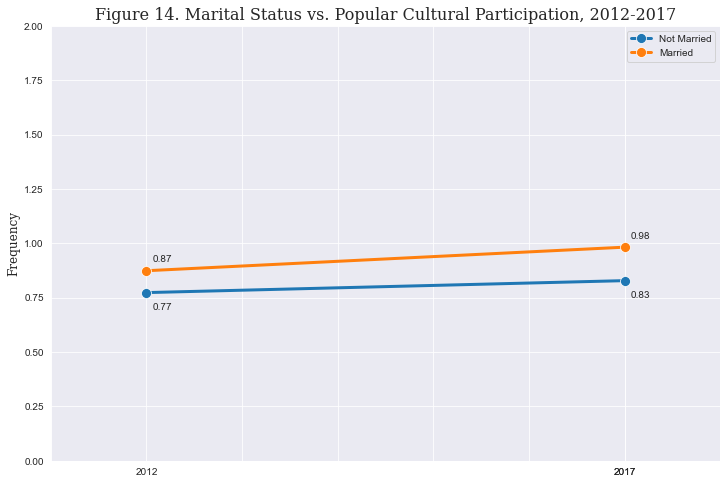

In [425]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [single_12.popular.mean(), single_17.popular.mean()]
value2 = [married_12.popular.mean(), married_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Not Married') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Married')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.06, value1[i]-0.08, round(value1[i],2))
    plt.text(year[i]+0.06, value2[i]+0.04, round(value2[i],2))
    
plt.title('Figure 14. Marital Status vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [426]:
# 2012 vs. 2017 - Married
levene = stats.levene(married_12.popular, married_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=21.738575800926974, pvalue=3.152247541281623e-06)

In [427]:
# 2012 vs. 2017 - Married
stats.ttest_ind(married_12.popular, married_17.popular, equal_var=False)

Ttest_indResult(statistic=-5.0042854416889915, pvalue=5.736713862138947e-07)

In [428]:
# 2012 vs. 2017 - Not Married
levene = stats.levene(single_12.popular, single_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=6.641082733952534, pvalue=0.009976956838357278)

In [429]:
# 2012 vs. 2017 - Not Married
stats.ttest_ind(single_12.popular, single_17.popular, equal_var=False)

Ttest_indResult(statistic=-2.564021053074591, pvalue=0.010361574310505677)

<div class="alert alert-block alert-info">
<p>There is a statistically significant increase in the frequencies of popular cultural participation for both the married and unmarried groups between 2012 and 2017.</p></div>

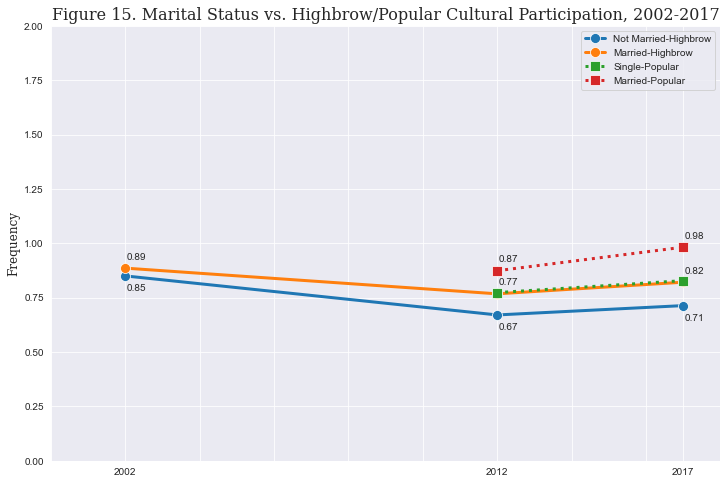

In [433]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]

value_h1 = [single_02.highbrow.mean(), single_12.highbrow.mean(), single_17.highbrow.mean()]
value_h2 = [married_02.highbrow.mean(), married_12.highbrow.mean(), married_17.highbrow.mean()]
value_p1 = [single_12.popular.mean(), single_17.popular.mean()]
value_p2 = [married_12.popular.mean(), married_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Not Married-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Married-Highbrow')

ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, label='Single-Popular') 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, label='Married-Popular')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.04, value_h1[i]-0.07, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]+0.04, round(value_h2[i],2))
for i in range(len(year2)):
#     plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]+0.04, round(value_p2[i],2)) 
    
plt.title('Figure 15. Marital Status vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

### 4.5. Gender

#### Highbrow Activities

In [434]:
# 2017

In [435]:
data_17.PESEX.describe()

count    8793.000000
mean        0.544410
std         0.498052
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PESEX, dtype: float64

In [436]:
data_17.PESEX.value_counts()

1.0    4787
0.0    4006
Name: PESEX, dtype: int64

In [437]:
stats.pearsonr(data_17.PESEX, data_17.highbrow)

(0.07365851187349366, 4.663962098407857e-12)

In [438]:
stats.pearsonr(data_17.PESEX, data_17.popular)

(0.06042716583105359, 1.42221730779809e-08)

In [439]:
female_17 = data_17[data_17.PESEX == 1]
male_17 = data_17[data_17.PESEX == 0]

In [440]:
# 2012

In [441]:
stats.pearsonr(data_12.GENDER, data_12.highbrow)

(0.0587553540665816, 3.2875527071619473e-15)

In [442]:
stats.pearsonr(data_12.GENDER, data_12.popular)

(0.05877536768653929, 3.2175623724566597e-15)

In [443]:
female_12 = data_12[data_12.GENDER == 1]
male_12 = data_12[data_12.GENDER == 0]

In [444]:
# 2002

In [445]:
stats.pearsonr(data_02.GENDER, data_02.highbrow)

(0.07014613301613046, 3.2553638198133697e-18)

In [446]:
female_02 = data_02[data_02.GENDER == 1]
male_02 = data_02[data_02.GENDER == 0]

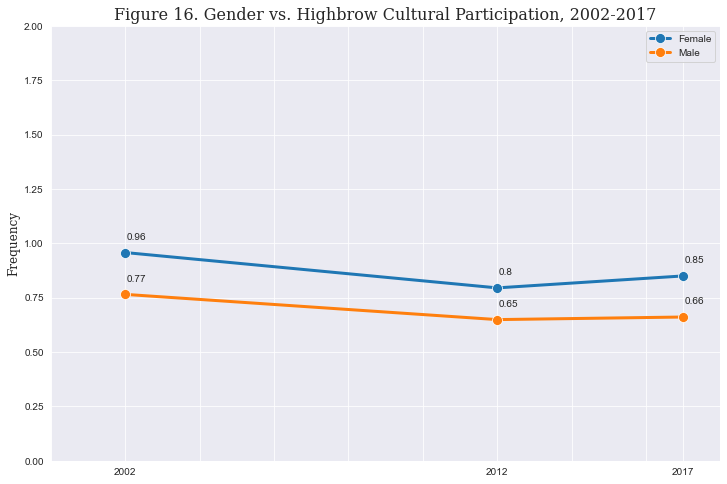

In [447]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [female_02.highbrow.mean(), female_12.highbrow.mean(), female_17.highbrow.mean()]
value2 = [male_02.highbrow.mean(), male_12.highbrow.mean(), male_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Female') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Male')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.04, value1[i]+0.06, round(value1[i],2))
    plt.text(year[i]+0.04, value2[i]+0.06, round(value2[i],2))
    
plt.title('Figure 16. Gender vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
plt.show()

In [448]:
# 2002 vs. 2017 - Female
levene = stats.levene(female_02.highbrow, female_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=18.09104774348054, pvalue=2.1203828974205893e-05)

In [449]:
# 2002 vs. 2017 - Female
stats.ttest_ind(female_02.highbrow, female_17.highbrow, equal_var=False)

Ttest_indResult(statistic=4.315097787048544, pvalue=1.6100978438333465e-05)

In [450]:
# 2012 vs. 2017 - Female
levene = stats.levene(female_12.highbrow, female_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=5.603060465669848, pvalue=0.017942318817554617)

In [451]:
# 2012 vs. 2017 - Female
stats.ttest_ind(female_12.highbrow, female_17.highbrow, equal_var=False)

Ttest_indResult(statistic=-2.3333050111687825, pvalue=0.019653541423473808)

In [452]:
# 2002 vs. 2017 - Male
levene = stats.levene(male_02.highbrow, male_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=17.75133336320603, pvalue=2.5376183870180138e-05)

In [453]:
# 2002 vs. 2017 - Male
stats.ttest_ind(male_02.highbrow, male_17.highbrow, equal_var=False)

Ttest_indResult(statistic=4.311006146714563, pvalue=1.642529469150644e-05)

In [454]:
# 2012 vs. 2017 - Male
levene = stats.levene(male_12.highbrow, male_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.2793418094425863, pvalue=0.5971424104052381)

In [455]:
# 2012 vs. 2017 - Male
stats.ttest_ind(male_12.highbrow, male_17.highbrow)

Ttest_indResult(statistic=-0.5285279646741373, pvalue=0.5971424104020098)

<div class="alert alert-block alert-info">
<p>There is a statistically significant decline in highbrow cultural participation for both genders between 2002 and 2012. After 2012, only females significantly increased their participation.</p></div>

#### Popular Activities

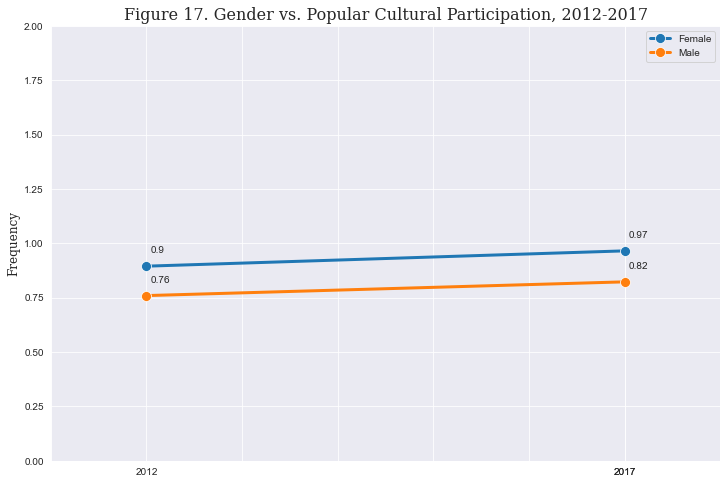

In [456]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [female_12.popular.mean(), female_17.popular.mean()]
value2 = [male_12.popular.mean(), male_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Female') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Male')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.04, value1[i]+0.06, round(value1[i],2))
    plt.text(year[i]+0.04, value2[i]+0.06, round(value2[i],2))
    
plt.title('Figure 17. Gender vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [457]:
# 2012 vs. 2017 - Female
levene = stats.levene(female_12.popular, female_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal

LeveneResult(statistic=11.11451325130302, pvalue=0.000858715436340753)

In [458]:
# 2012 vs. 2017 - Female
stats.ttest_ind(female_12.popular, female_17.popular, equal_var=False)

Ttest_indResult(statistic=-3.3064327729374887, pvalue=0.000948476380255472)

In [459]:
# 2012 vs. 2017 - Male
levene = stats.levene(male_12.popular, male_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal

LeveneResult(statistic=8.804121770377067, pvalue=0.003011249258768242)

In [460]:
# 2012 vs. 2017 - Male
stats.ttest_ind(male_12.popular, male_17.popular, equal_var=False)

Ttest_indResult(statistic=-2.9489506593280828, pvalue=0.0031980556233510244)

<div class="alert alert-block alert-info">
    <p>Both genders significantly increased their participation in popular cultural activities between 2012 and 2017.</p></div>

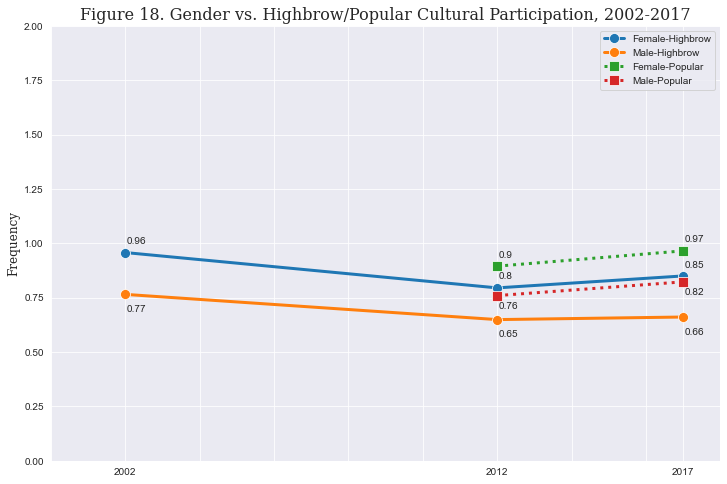

In [462]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]

value_h1 = [female_02.highbrow.mean(), female_12.highbrow.mean(), female_17.highbrow.mean()]
value_h2 = [male_02.highbrow.mean(), male_12.highbrow.mean(), male_17.highbrow.mean()]
value_p1 = [female_12.popular.mean(), female_17.popular.mean()]
value_p2 = [male_12.popular.mean(), male_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Female-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Male-Highbrow')

ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, label='Female-Popular') 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, label='Male-Popular')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.04, value_h1[i]+0.04, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]-0.08, round(value_h2[i],2))
for i in range(len(year2)):
    plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]-0.06, round(value_p2[i],2))    
    
plt.title('Figure 18. Gender vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

### 4.6. Race

#### Highbrow Activities

In [463]:
# 2017

In [464]:
data_17.PTDTRACE.describe()

count    8793.000000
mean        0.828159
std         0.377264
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PTDTRACE, dtype: float64

In [465]:
data_17.PTDTRACE.value_counts()

1.0    7282
0.0    1511
Name: PTDTRACE, dtype: int64

In [466]:
stats.pearsonr(data_17.PTDTRACE, data_17.highbrow)

(0.060076292070131036, 1.7233118317149614e-08)

In [467]:
stats.pearsonr(data_17.PTDTRACE, data_17.popular)

(0.08285303014008952, 7.167644517390518e-15)

In [468]:
white_17 = data_17[data_17.PTDTRACE == 1]
others_17 = data_17[data_17.PTDTRACE == 0]

In [469]:
# 2012

In [470]:
stats.pearsonr(data_12.RACE, data_12.highbrow)

(0.06752155012157393, 1.3335789141686367e-19)

In [471]:
stats.pearsonr(data_12.RACE, data_12.popular)

(0.0837032795586723, 2.739406745540673e-29)

In [472]:
white_12 = data_12[data_12.RACE == 1]
others_12 = data_12[data_12.RACE == 0]

In [473]:
# 2002

In [474]:
stats.pearsonr(data_02.RACE, data_02.highbrow)

(0.08159966504408021, 4.17116125706461e-24)

In [475]:
white_02 = data_02[data_02.RACE == 1]
others_02 = data_02[data_02.RACE == 0]

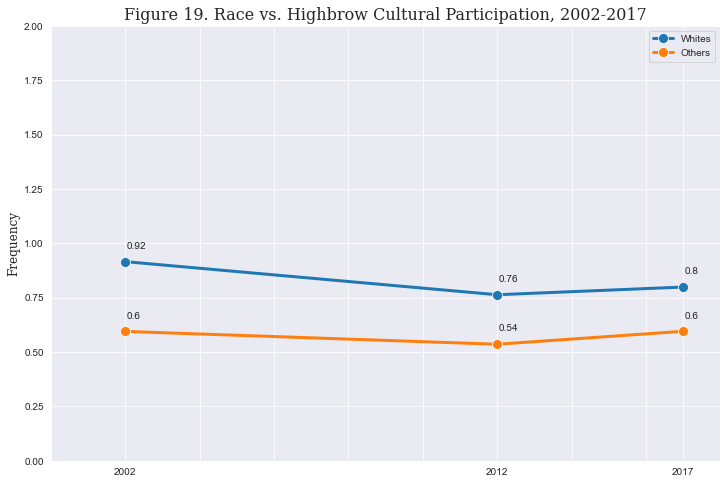

In [476]:
fig = plt.figure(figsize=(12,8))

year = [2002,2012,2017]
value1 = [white_02.highbrow.mean(), white_12.highbrow.mean(), white_17.highbrow.mean()]
value2 = [others_02.highbrow.mean(), others_12.highbrow.mean(), others_17.highbrow.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Whites') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Others')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.04, value1[i]+0.06, round(value1[i],2))
    plt.text(year[i]+0.04, value2[i]+0.06, round(value2[i],2))
    
plt.title('Figure 19. Race vs. Highbrow Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc='best')
plt.grid()
plt.show()

In [477]:
# 2002 vs. 2017 - Whites
levene = stats.levene(white_02.highbrow, white_17.highbrow)
levene
# We can reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=34.40783607465172, pvalue=4.537936133778399e-09)

In [478]:
# 2002 vs. 2017 - Whites
stats.ttest_ind(white_02.highbrow, white_17.highbrow, equal_var=False)

Ttest_indResult(statistic=5.990135793703354, pvalue=2.1417083519886356e-09)

In [479]:
# 2012 vs. 2017 - Whites
levene = stats.levene(white_12.highbrow, white_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=3.768478120439468, pvalue=0.05223968503077821)

In [480]:
# 2012 vs. 2017 - Whites
stats.ttest_ind(white_12.highbrow, white_17.highbrow)

Ttest_indResult(statistic=-1.9412568404102193, pvalue=0.052239685030698105)

In [481]:
# 2002 vs. 2017 - Others
levene = stats.levene(others_02.highbrow, others_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=0.00022316818186089626, pvalue=0.9880818080284258)

In [482]:
# 2002 vs. 2017 - Others
stats.ttest_ind(others_02.highbrow, others_17.highbrow)

Ttest_indResult(statistic=-0.014938814606952464, pvalue=0.9880818080269493)

In [483]:
# 2012 vs. 2017 - Others
levene = stats.levene(others_12.highbrow, others_17.highbrow)
levene
# We cannot reject the null hypothesis which indicates that the population variances are equal.

LeveneResult(statistic=2.9534292917611302, pvalue=0.08576596253498663)

In [484]:
# 2012 vs. 2017 - Others
stats.ttest_ind(others_12.highbrow, others_17.highbrow)

Ttest_indResult(statistic=-1.7185544192027002, pvalue=0.08576596253499996)

<div class="alert alert-block alert-info">
<p>Between 2002 and 2017, whites' frequency of highbrow cultural participation significantly declined even though the decline ended in 2012 and participation increased slightly after 2012. Other races' participation frequency do not show any significant changes between 2002 and 2012.</p></div>

#### Popular Activities

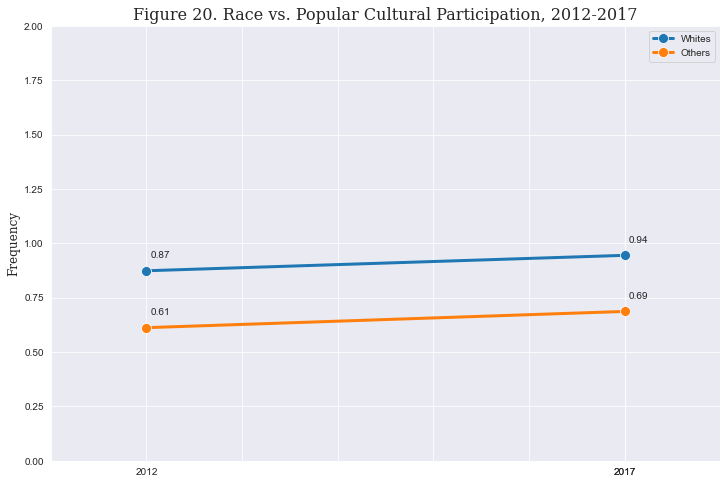

In [525]:
fig = plt.figure(figsize=(12,8))

year = [2012,2017]
value1 = [white_12.popular.mean(), white_17.popular.mean()]
value2 = [others_12.popular.mean(), others_17.popular.mean()]

ax = sns.lineplot(x=year, y=value1, linewidth=3, marker='o', markersize=10, label='Whites') 
ax = sns.lineplot(x=year, y=value2, linewidth=3, marker='o', markersize=10, label='Others')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year)):
    plt.text(year[i]+0.04, value1[i]+0.06, round(value1[i],2))
    plt.text(year[i]+0.04, value2[i]+0.06, round(value2[i],2))
    
plt.title('Figure 20. Race vs. Popular Cultural Participation, 2012-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.grid()
plt.show()

In [486]:
# 2012 vs. 2017 - Whites
levene = stats.levene(white_12.popular, white_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal

LeveneResult(statistic=17.968354269380704, pvalue=2.2550916604668227e-05)

In [487]:
# 2012 vs. 2017 - Whites
stats.ttest_ind(white_12.popular, white_17.popular, equal_var=False)

Ttest_indResult(statistic=-4.2114169870871185, pvalue=2.5534317610914866e-05)

In [488]:
# 2012 vs. 2017 - Others
levene = stats.levene(others_12.popular, others_17.popular)
levene
# We can reject the null hypothesis which indicates that the population variances are equal

LeveneResult(statistic=5.039264876639189, pvalue=0.024828542099996468)

In [489]:
# 2012 vs. 2017 - Others
stats.ttest_ind(others_12.popular, others_17.popular, equal_var=False)

Ttest_indResult(statistic=-2.206229455112737, pvalue=0.027445503928579133)

<div class="alert alert-block alert-info">
    <p>Both whites and people of other races significantly increased their participation in popular cultural activities between 2012 and 2017.</p></div>

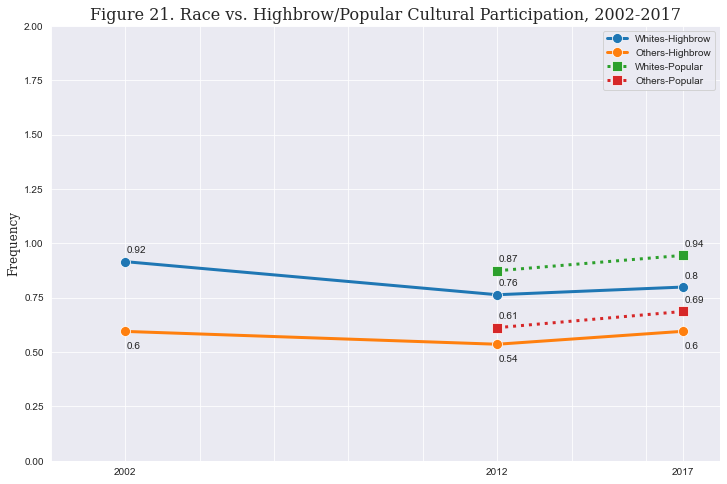

In [526]:
fig = plt.figure(figsize=(12,8))

year1 = [2002,2012,2017]
year2 = [2012,2017]

value_h1 = [white_02.highbrow.mean(), white_12.highbrow.mean(), white_17.highbrow.mean()]
value_h2 = [others_02.highbrow.mean(), others_12.highbrow.mean(), others_17.highbrow.mean()]
value_p1 = [white_12.popular.mean(), white_17.popular.mean()]
value_p2 = [others_12.popular.mean(), others_17.popular.mean()]

ax = sns.lineplot(x=year1, y=value_h1, linewidth=3, marker='o', markersize=10, label='Whites-Highbrow') 
ax = sns.lineplot(x=year1, y=value_h2, linewidth=3, marker='o', markersize=10, label='Others-Highbrow')

ax = sns.lineplot(x=year2, y=value_p1, linewidth=3, marker='s', linestyle=':', markersize=10, label='Whites-Popular') 
ax = sns.lineplot(x=year2, y=value_p2, linewidth=3, marker='s', linestyle=':', markersize=10, label='Others-Popular')

x_ticks = np.append(ax.get_xticks(), 2017)
ax.set_ylim(ymin=0, ymax=2)
ax.set_xticks(x_ticks)
xticks = ax.xaxis.get_major_ticks()
for i in [0,2,3,4,5,7,8,9]:
    xticks[i].label1.set_visible(False)
    
for i in range(len(year1)):
    plt.text(year1[i]+0.04, value_h1[i]+0.04, round(value_h1[i],2))
    plt.text(year1[i]+0.04, value_h2[i]-0.08, round(value_h2[i],2))
for i in range(len(year2)):
    plt.text(year2[i]+0.04, value_p1[i]+0.04, round(value_p1[i],2))
    plt.text(year2[i]+0.04, value_p2[i]+0.04, round(value_p2[i],2))    
    
plt.title('Figure 21. Race vs. Highbrow/Popular Cultural Participation, 2002-2017', 
          fontdict={'fontsize':16, 'fontfamily':'serif'}, ha='center')
plt.ylabel('Frequency', size=12, fontfamily='serif')
plt.legend(loc=1)
plt.grid()
# plt.savefig('test.pdf');

<div class="alert alert-block alert-info">
<h3>Conclusion</h3><br>
<p>The results of this study show that regardless of the descriptive features that were used to categorize individuals, there is a general trend in cultural participation: (1) highbrow cultural participation declined between 2002 and 2012, and there is either a stability or an increase in participation between 2012 and 2017; (2) popular cultural participation increased between 2012 and 2017. I believe this is a sign of omnivorousness, specifically for the upper-class individuals. Why so?<br><br>This is because it seems to be the case that today elite status is not directly related to the appreciation of high cultural forms and moral disdain from all other aesthetic expressions but to the appreciation of both high and popular cultural forms together. Today, status is gained from having knowledge of and participating in many, if not all, forms of cultural activities. In this regard, it seems that those who can be omnivore will be at the top of the emerging status hierarchy.</p></div>

<div class="alert alert-block alert-danger"><h1><center>Thank You</center></h1></div>